## Liver Disease Prediction

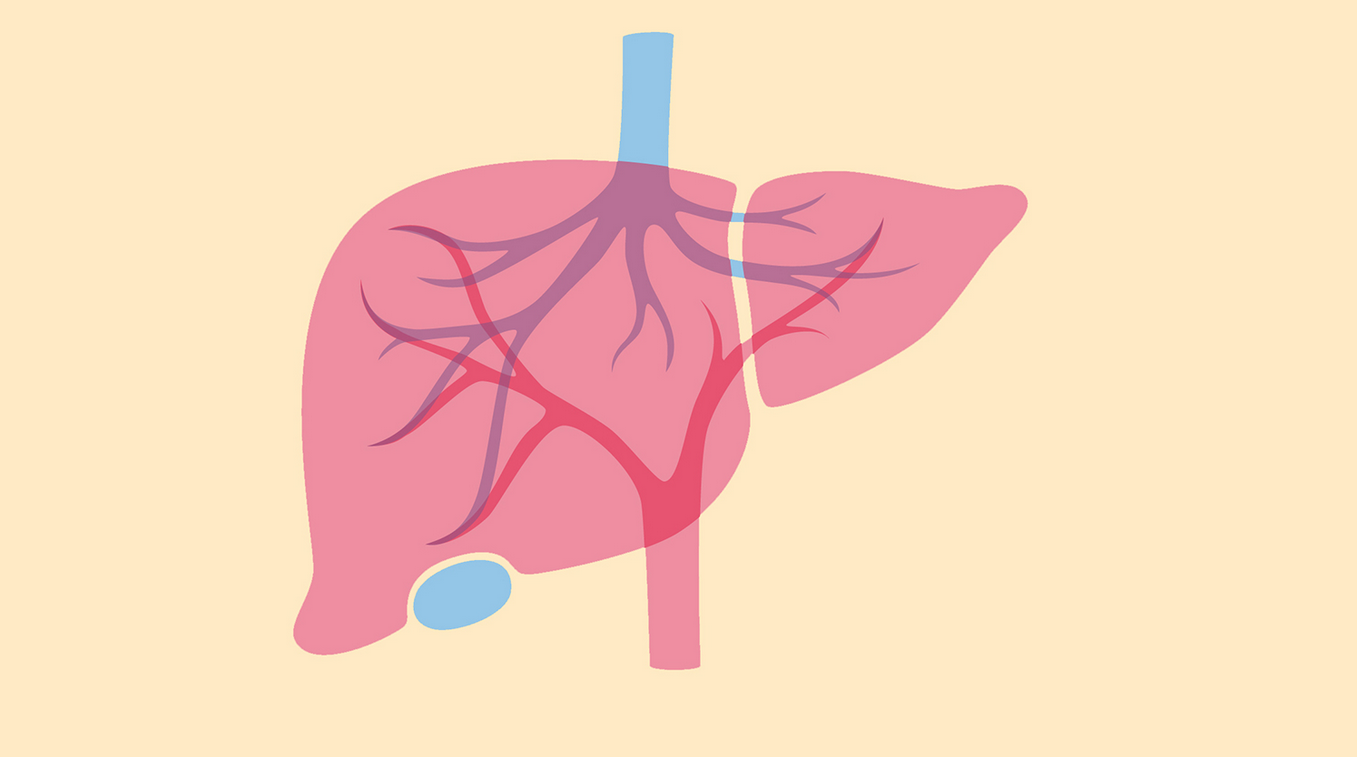

## About The Dataset

##### The Liver Disease Dataset is collection of Blood Test results records and its assosciated information.This data helps to that perticular person will have liver disease or not .
##### This dataset contains various factors like Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase,Aspartate_Aminotransferase ,Total_Protiens ,Albumin , Albumin_and_Globulin_Ratio and Dataset.Here we will using this dataset for to make analysis on liver disease and make prediction on liver disease or not.

## Brief Overview About The Dataset

##### 1.Age : Older age is associated with an increased risk of certain liver diseases like fatty liver disease.
##### 2.Gender : While some liver diseases affect both genders equally, others, like alcoholic liver disease, are more prevalent in men.
##### 3.Total Bilirubin : Measures the levels of bilirubin, a pigment produced by the breakdown of red blood cells. Elevated levels can indicate liver dysfunction.
##### 4.Direct Bilirubin : This portion of total bilirubin directly conjugates with glucuronic acid and is excreted by the liver. High levels could suggest bile duct obstruction.
##### 5.Alkaline Phosphatase : An enzyme found in the liver, bones, and other tissues. Elevated ALP levels can indicate liver or bone disease.
##### 6.Alanine Aminotransferase : An enzyme primarily found in the liver. High ALT levels can signify liver damage.
##### 7.Aspartate Aminotransferase : Another liver enzyme. Elevated AST levels, along with high ALT, are often indicative of liver cell injury.
##### 8.Total Proteins : Measures the total amount of protein in the blood. Low levels can indicate malnutrition or liver disease.
##### 9.Albumin : A major protein produced by the liver. Low albumin levels can suggest liver dysfunction or other issues.
##### 10.Albumin-Globulin Ratio : Helps assess the balance between albumin and globulins . A low Albumin-Globulin ratio can indicate liver disease.
##### 11.Dataset : Dataset is the Target feature. It contains results are 1 and 2 . 1 means patient has liver disease and 2 means patient has not liver disease.

### Import Libraries

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

### Import Dataset

In [2]:
df = pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head(2)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1

## Exploratory Data Analysis

##### Shape 

In [4]:
df.shape

(583, 11)

##### size

In [5]:
df.size

6413

###### columns

In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

##### Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


##### Insights : we have only one column is object that is Gender only  and rest of columns are numerical columns 

###### Insights : from visualization of info we get understand there is only one column has missing values like Albumin_and_Globulin_Ratio and only 5 missing values

##### split data into numeric and characters columns

In [8]:
numeric_features = []
character_features =  []

for col in df.columns :
    
    if df[col].dtype == 'object':
        
        
        character_features.append(col)
        
    else:
        
        numeric_features.append(col)

In [9]:
numeric_features

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [10]:
character_features

['Gender']

### Describe

In [11]:
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

##### Insights : By visualising the decribe  , we get to know data is this data is not normally distributed and most of the data is rightly skewed or positive skewed  as well as left skewed and negative skewed also

#### Skewness

In [12]:
df.skew()

Age                           -0.029385
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.992299
Dataset                        0.947140
dtype: float64

##### Check distribution of dataset

##### Numeric Features

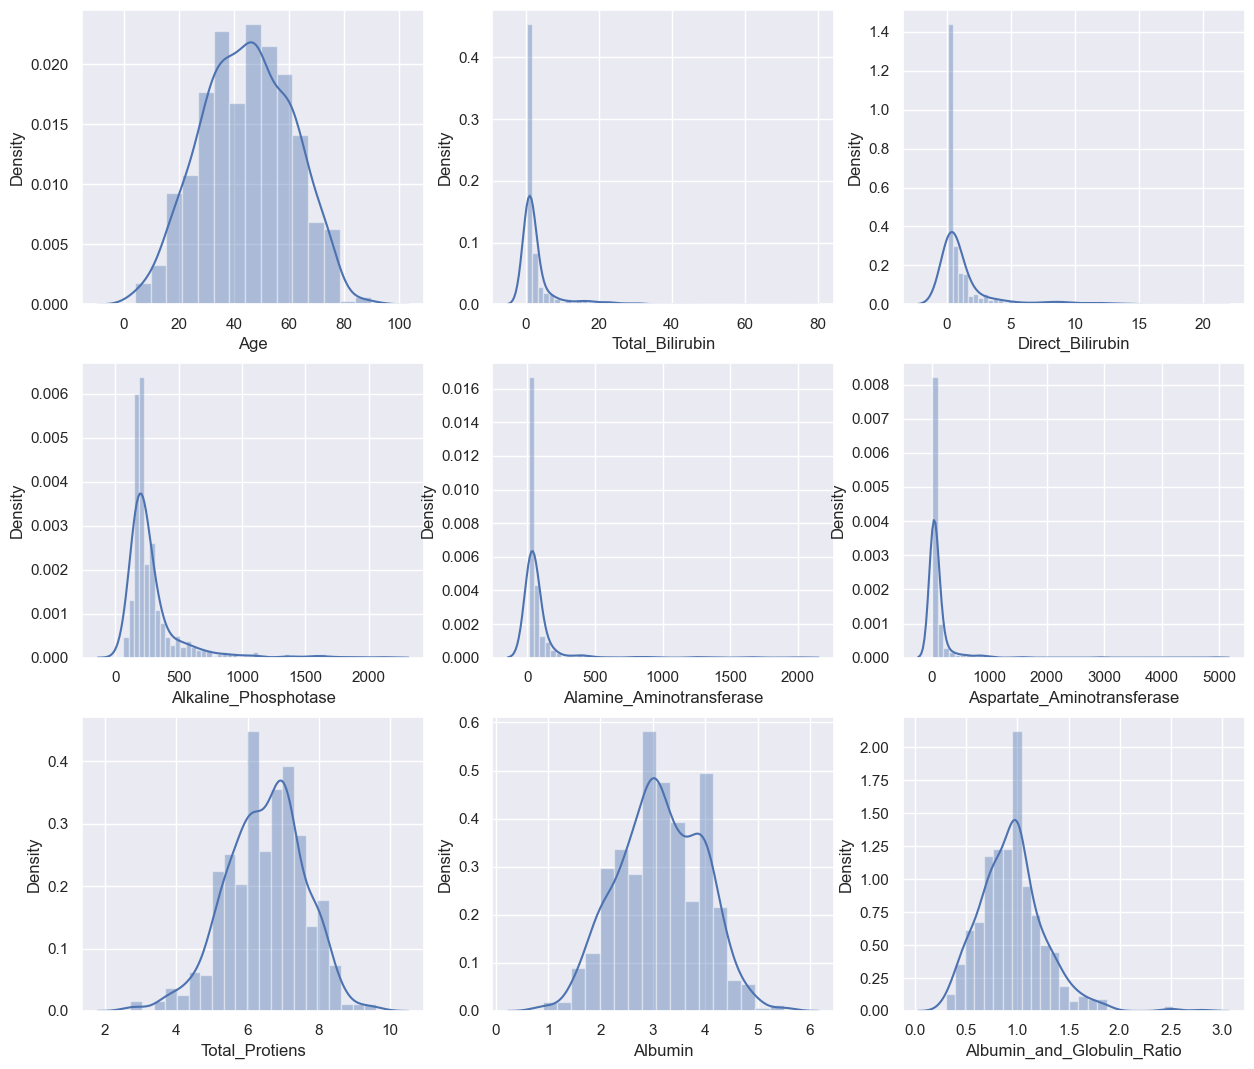

In [13]:
plt.figure(figsize = (15 , 13))
i = 1
for col in df[numeric_features].columns[:-1]:

    plt.subplot(3,3,i)
    
    sns.distplot(df[col])
    
    i = i + 1

##### Character features

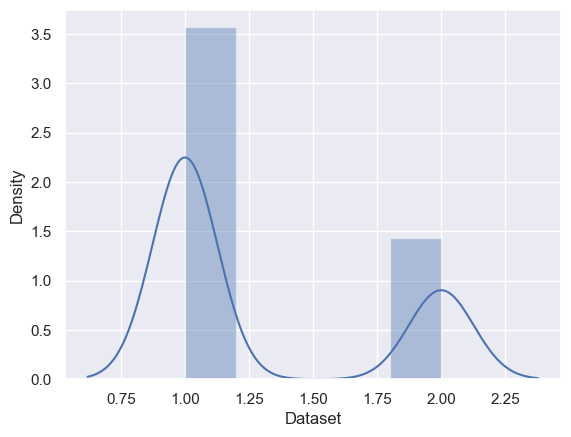

In [14]:
sns.distplot(df['Dataset'])
plt.show()

## Univariate Analysis

##### Check is there any ambiguity value as well as uniaue values

In [15]:
for col in df.columns:
    
    print('*' * 30 ,col , '*' * 30)
    
    print()
    print()
    
    print(df[col].nunique())
    
    print()
    print()

****************************** Age ******************************


72


****************************** Gender ******************************


2


****************************** Total_Bilirubin ******************************


113


****************************** Direct_Bilirubin ******************************


80


****************************** Alkaline_Phosphotase ******************************


263


****************************** Alamine_Aminotransferase ******************************


152


****************************** Aspartate_Aminotransferase ******************************


177


****************************** Total_Protiens ******************************


58


****************************** Albumin ******************************


40


****************************** Albumin_and_Globulin_Ratio ******************************


69


****************************** Dataset ******************************


2




##### Outliers detection

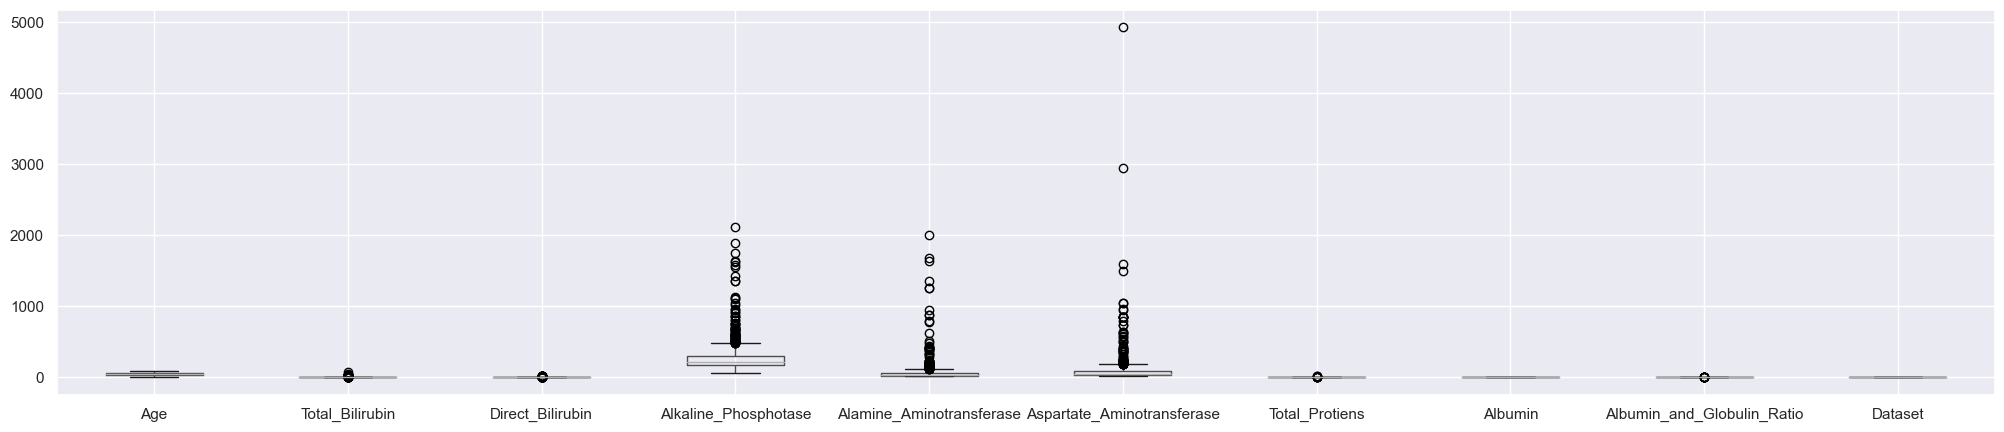

In [16]:
plt.figure(figsize = (25 , 5))
df.boxplot()
plt.show()

Axes(0.125,0.11;0.168478x0.77)
Axes(0.327174,0.11;0.168478x0.77)
Axes(0.529348,0.11;0.168478x0.77)
Axes(0.731522,0.11;0.168478x0.77)


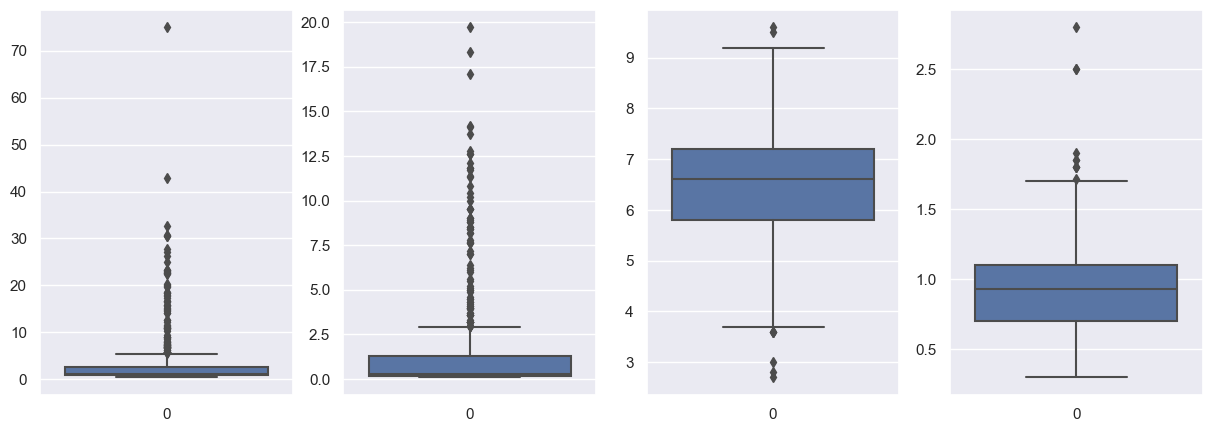

In [17]:
plt.figure(figsize = (15 , 5))

plt.subplot(1,4 ,1)
print(sns.boxplot(df['Total_Bilirubin']))

plt.subplot(1 ,4 ,2)
print(sns.boxplot(df['Direct_Bilirubin']))


plt.subplot(1 , 4 , 3)
print(sns.boxplot(df['Total_Protiens']))

plt.subplot(1 , 4 , 4)
print(sns.boxplot(df['Albumin_and_Globulin_Ratio']))


##### Insights : There are 7 features contain outliers .

##### we just check max value of features 

In [18]:
df[numeric_features].max().sort_values()

Dataset                          2.0
Albumin_and_Globulin_Ratio       2.8
Albumin                          5.5
Total_Protiens                   9.6
Direct_Bilirubin                19.7
Total_Bilirubin                 75.0
Age                             90.0
Alamine_Aminotransferase      2000.0
Alkaline_Phosphotase          2110.0
Aspartate_Aminotransferase    4929.0
dtype: float64

### Detect the outliers

In [19]:
def outliers_detection(df , n):
    
    for col in df[numeric_features].columns:
        
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].quantile(0.50)
        Q3 = df[col].quantile(0.75)
        
        IQR = (Q3 - Q1)
        
        upper_lim = Q3 + (n * IQR)
        lower_lim = Q1 - (n * IQR)
        
        
        outliers = (df[(df[col] > upper_lim) | (df[col] < lower_lim)].shape[0])
        
        print(f'{col} : {outliers}')

In [20]:
outliers_detection(df , 1.5)

Age : 0
Total_Bilirubin : 84
Direct_Bilirubin : 81
Alkaline_Phosphotase : 69
Alamine_Aminotransferase : 73
Aspartate_Aminotransferase : 66
Total_Protiens : 8
Albumin : 0
Albumin_and_Globulin_Ratio : 10
Dataset : 0


##### Insights : As we visulaise alraedy in box plot  , we have outliers contain 7 features  

### Bivariate Analysis 

##### Pairplot

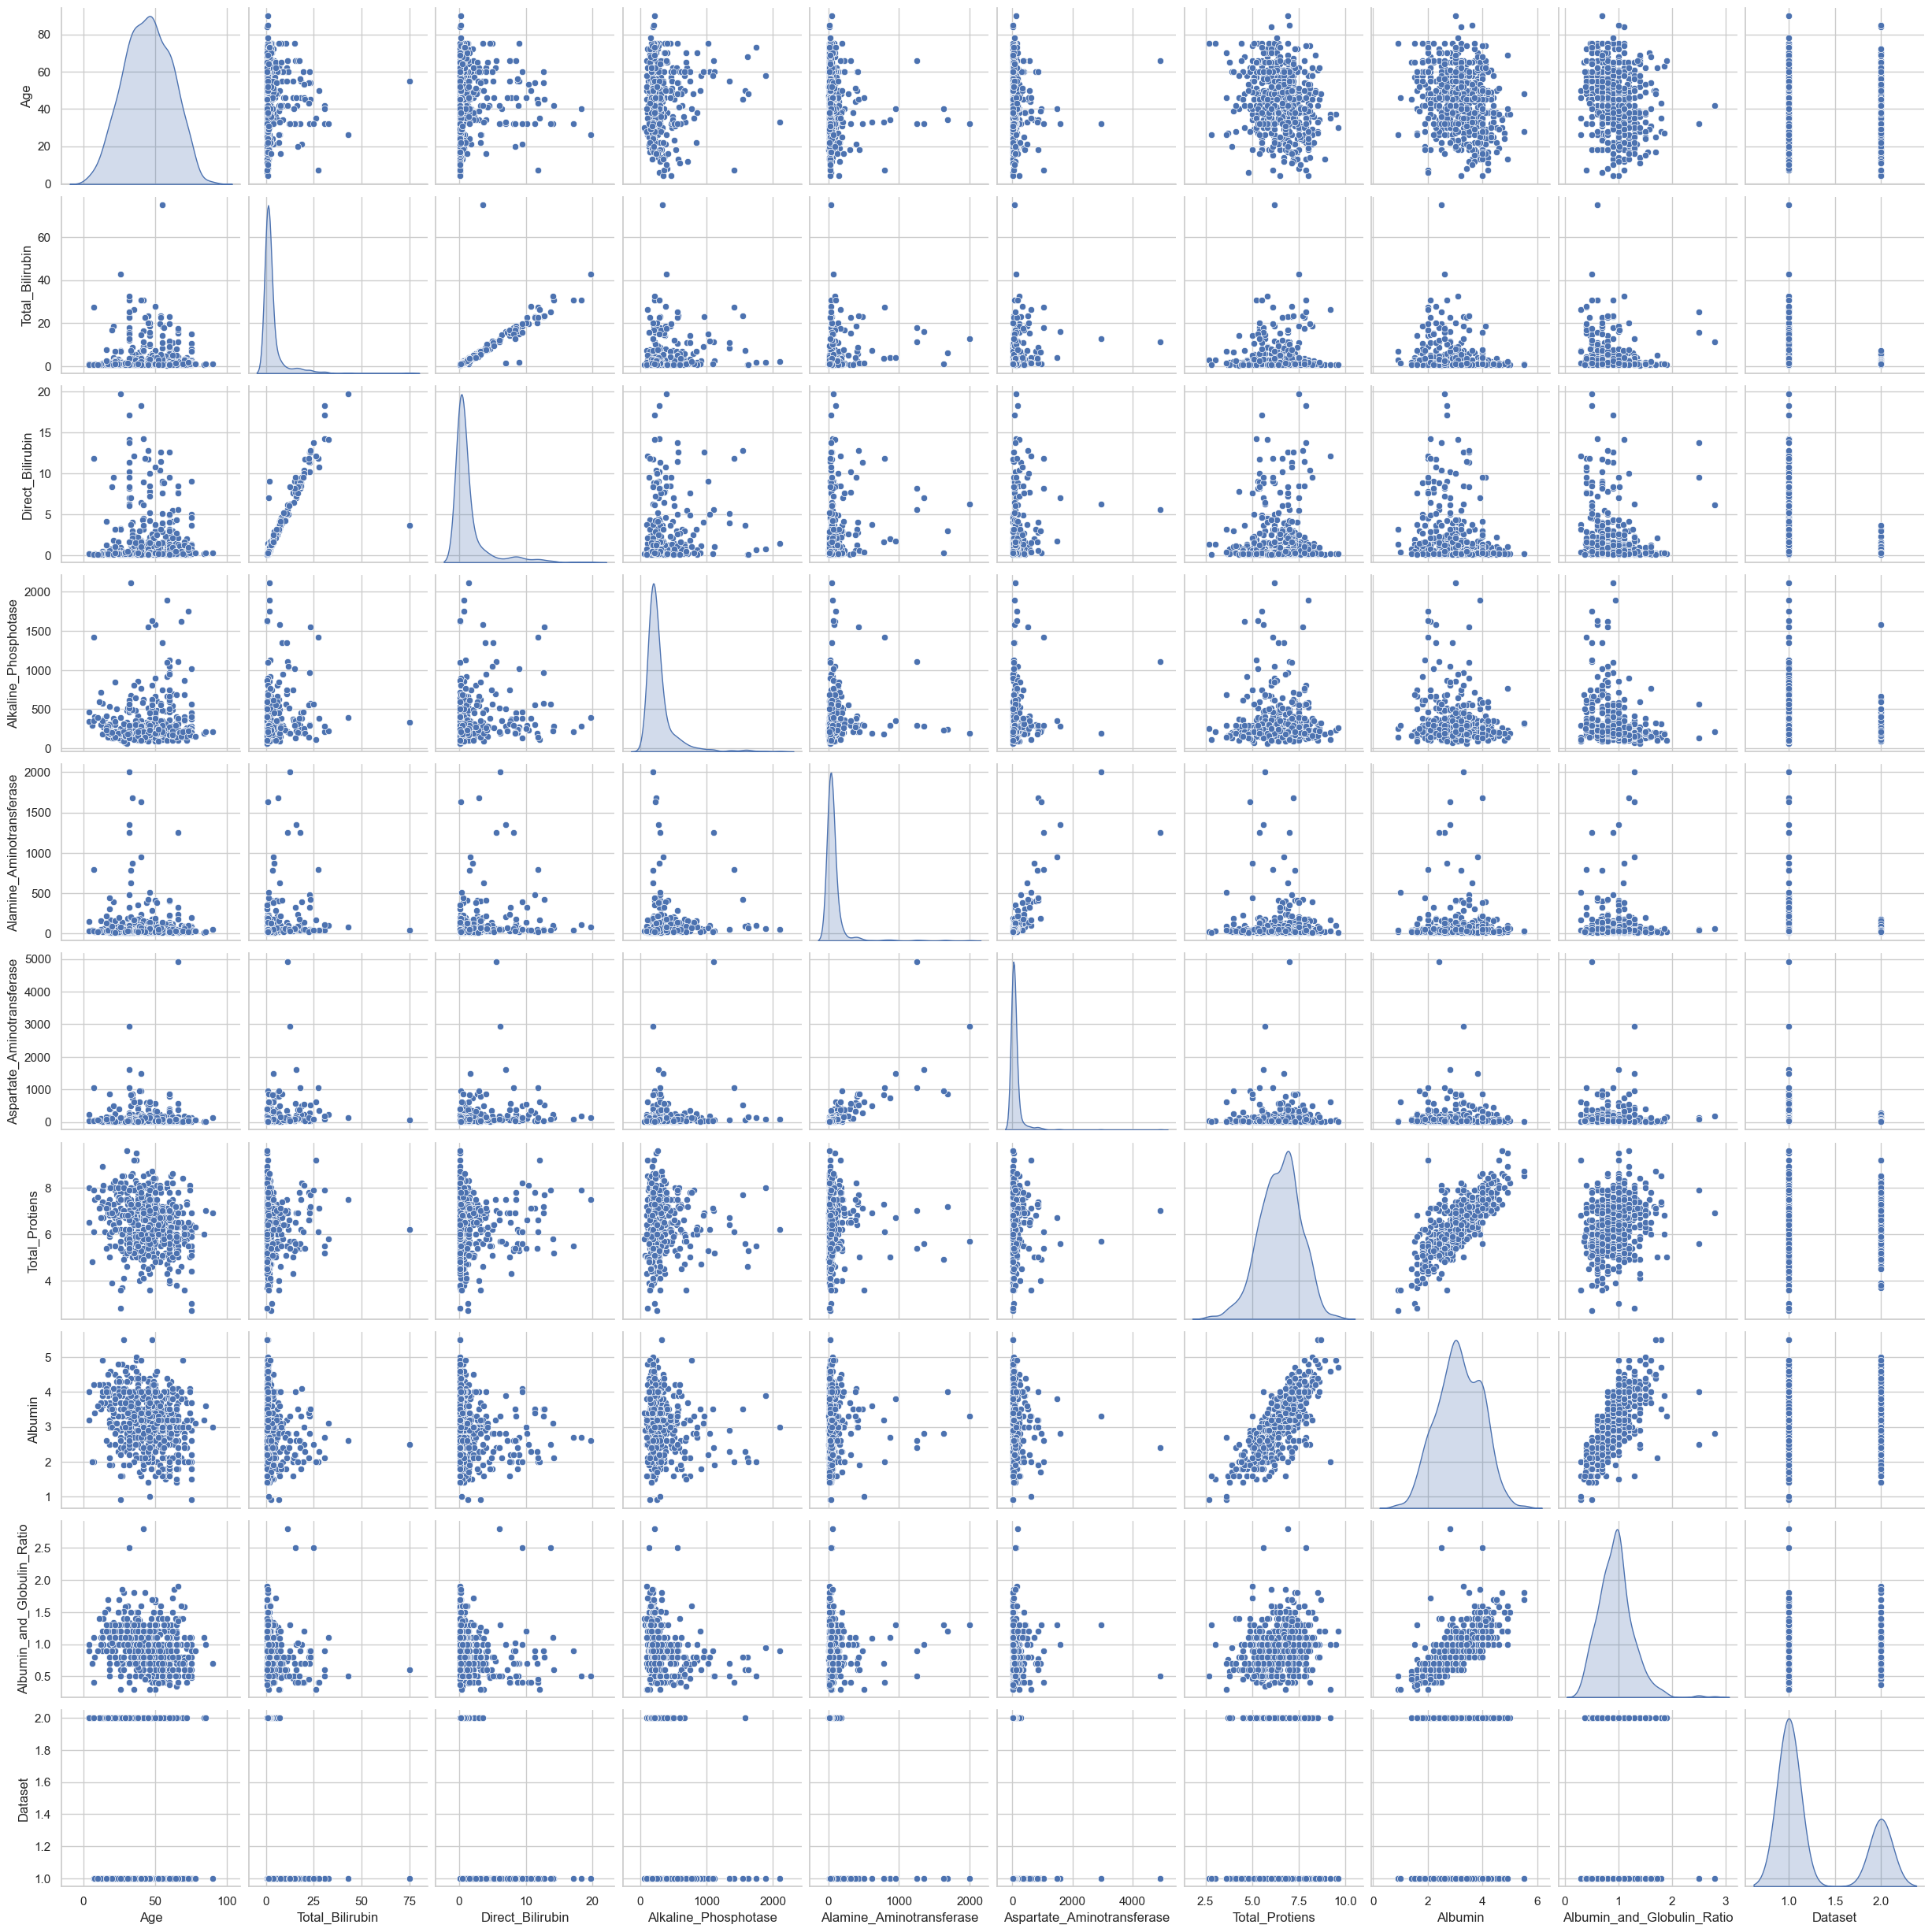

In [21]:
sns.set_style('whitegrid')
sns.pairplot(df , diag_kind = 'kde')
plt.show()

##### Check distribution of independent variable with respect to dependent variable

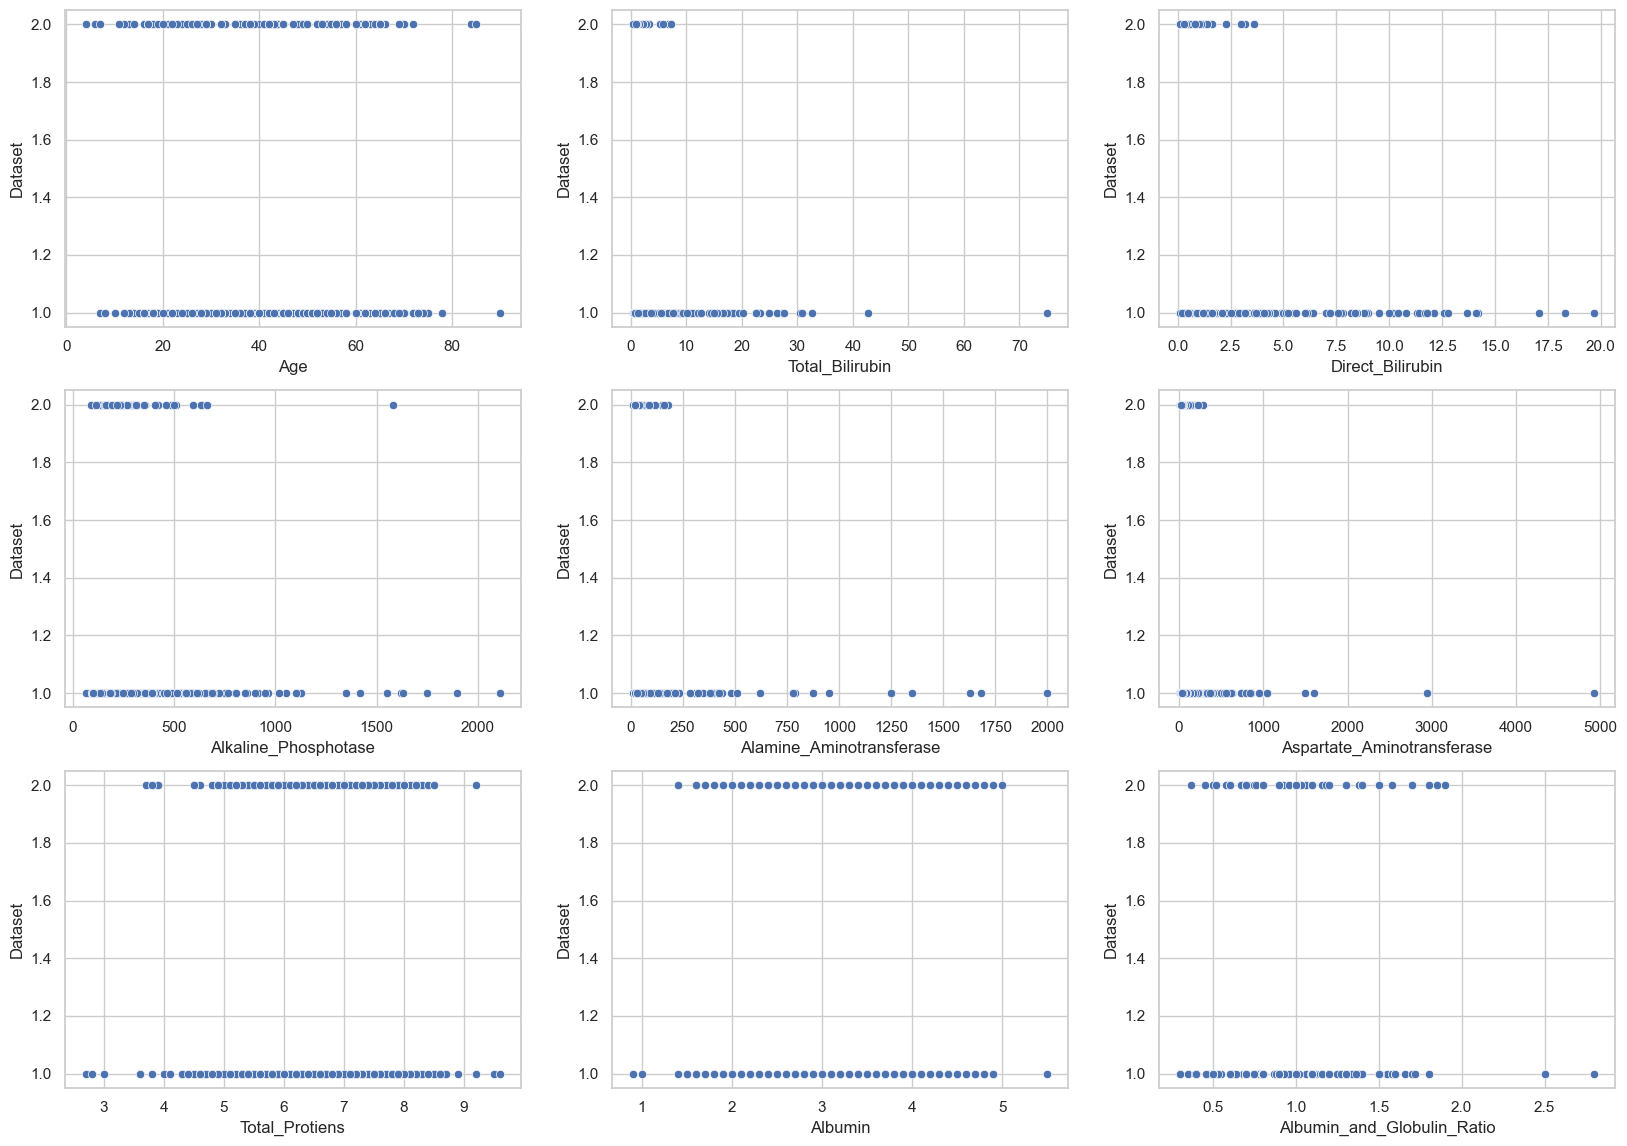

In [22]:
plt.figure(figsize = (20 , 14))

i = 1

for col in df[numeric_features].columns[:-1]:
    
    plt.subplot(3,3,i)
    sns.scatterplot(data = df , x = df[col] , y = df['Dataset'])
    i = i + 1

##### Scatterplot

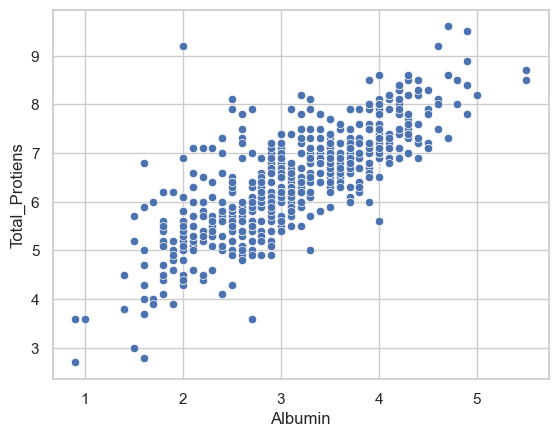

In [23]:
sns.scatterplot(data = df , x = df['Albumin'] , y = df['Total_Protiens'])
plt.show()

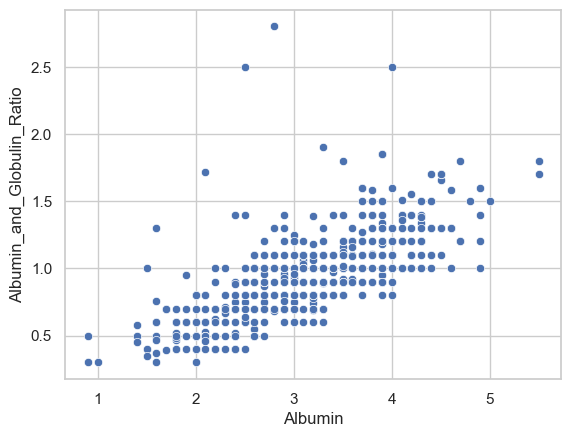

In [24]:
sns.scatterplot(data = df , x = df['Albumin'] , y = df['Albumin_and_Globulin_Ratio'])
plt.show()

##### Insights : Albumin have positive linear correlation with Total Proteins and Albumin_and_Globulin_Ratio.

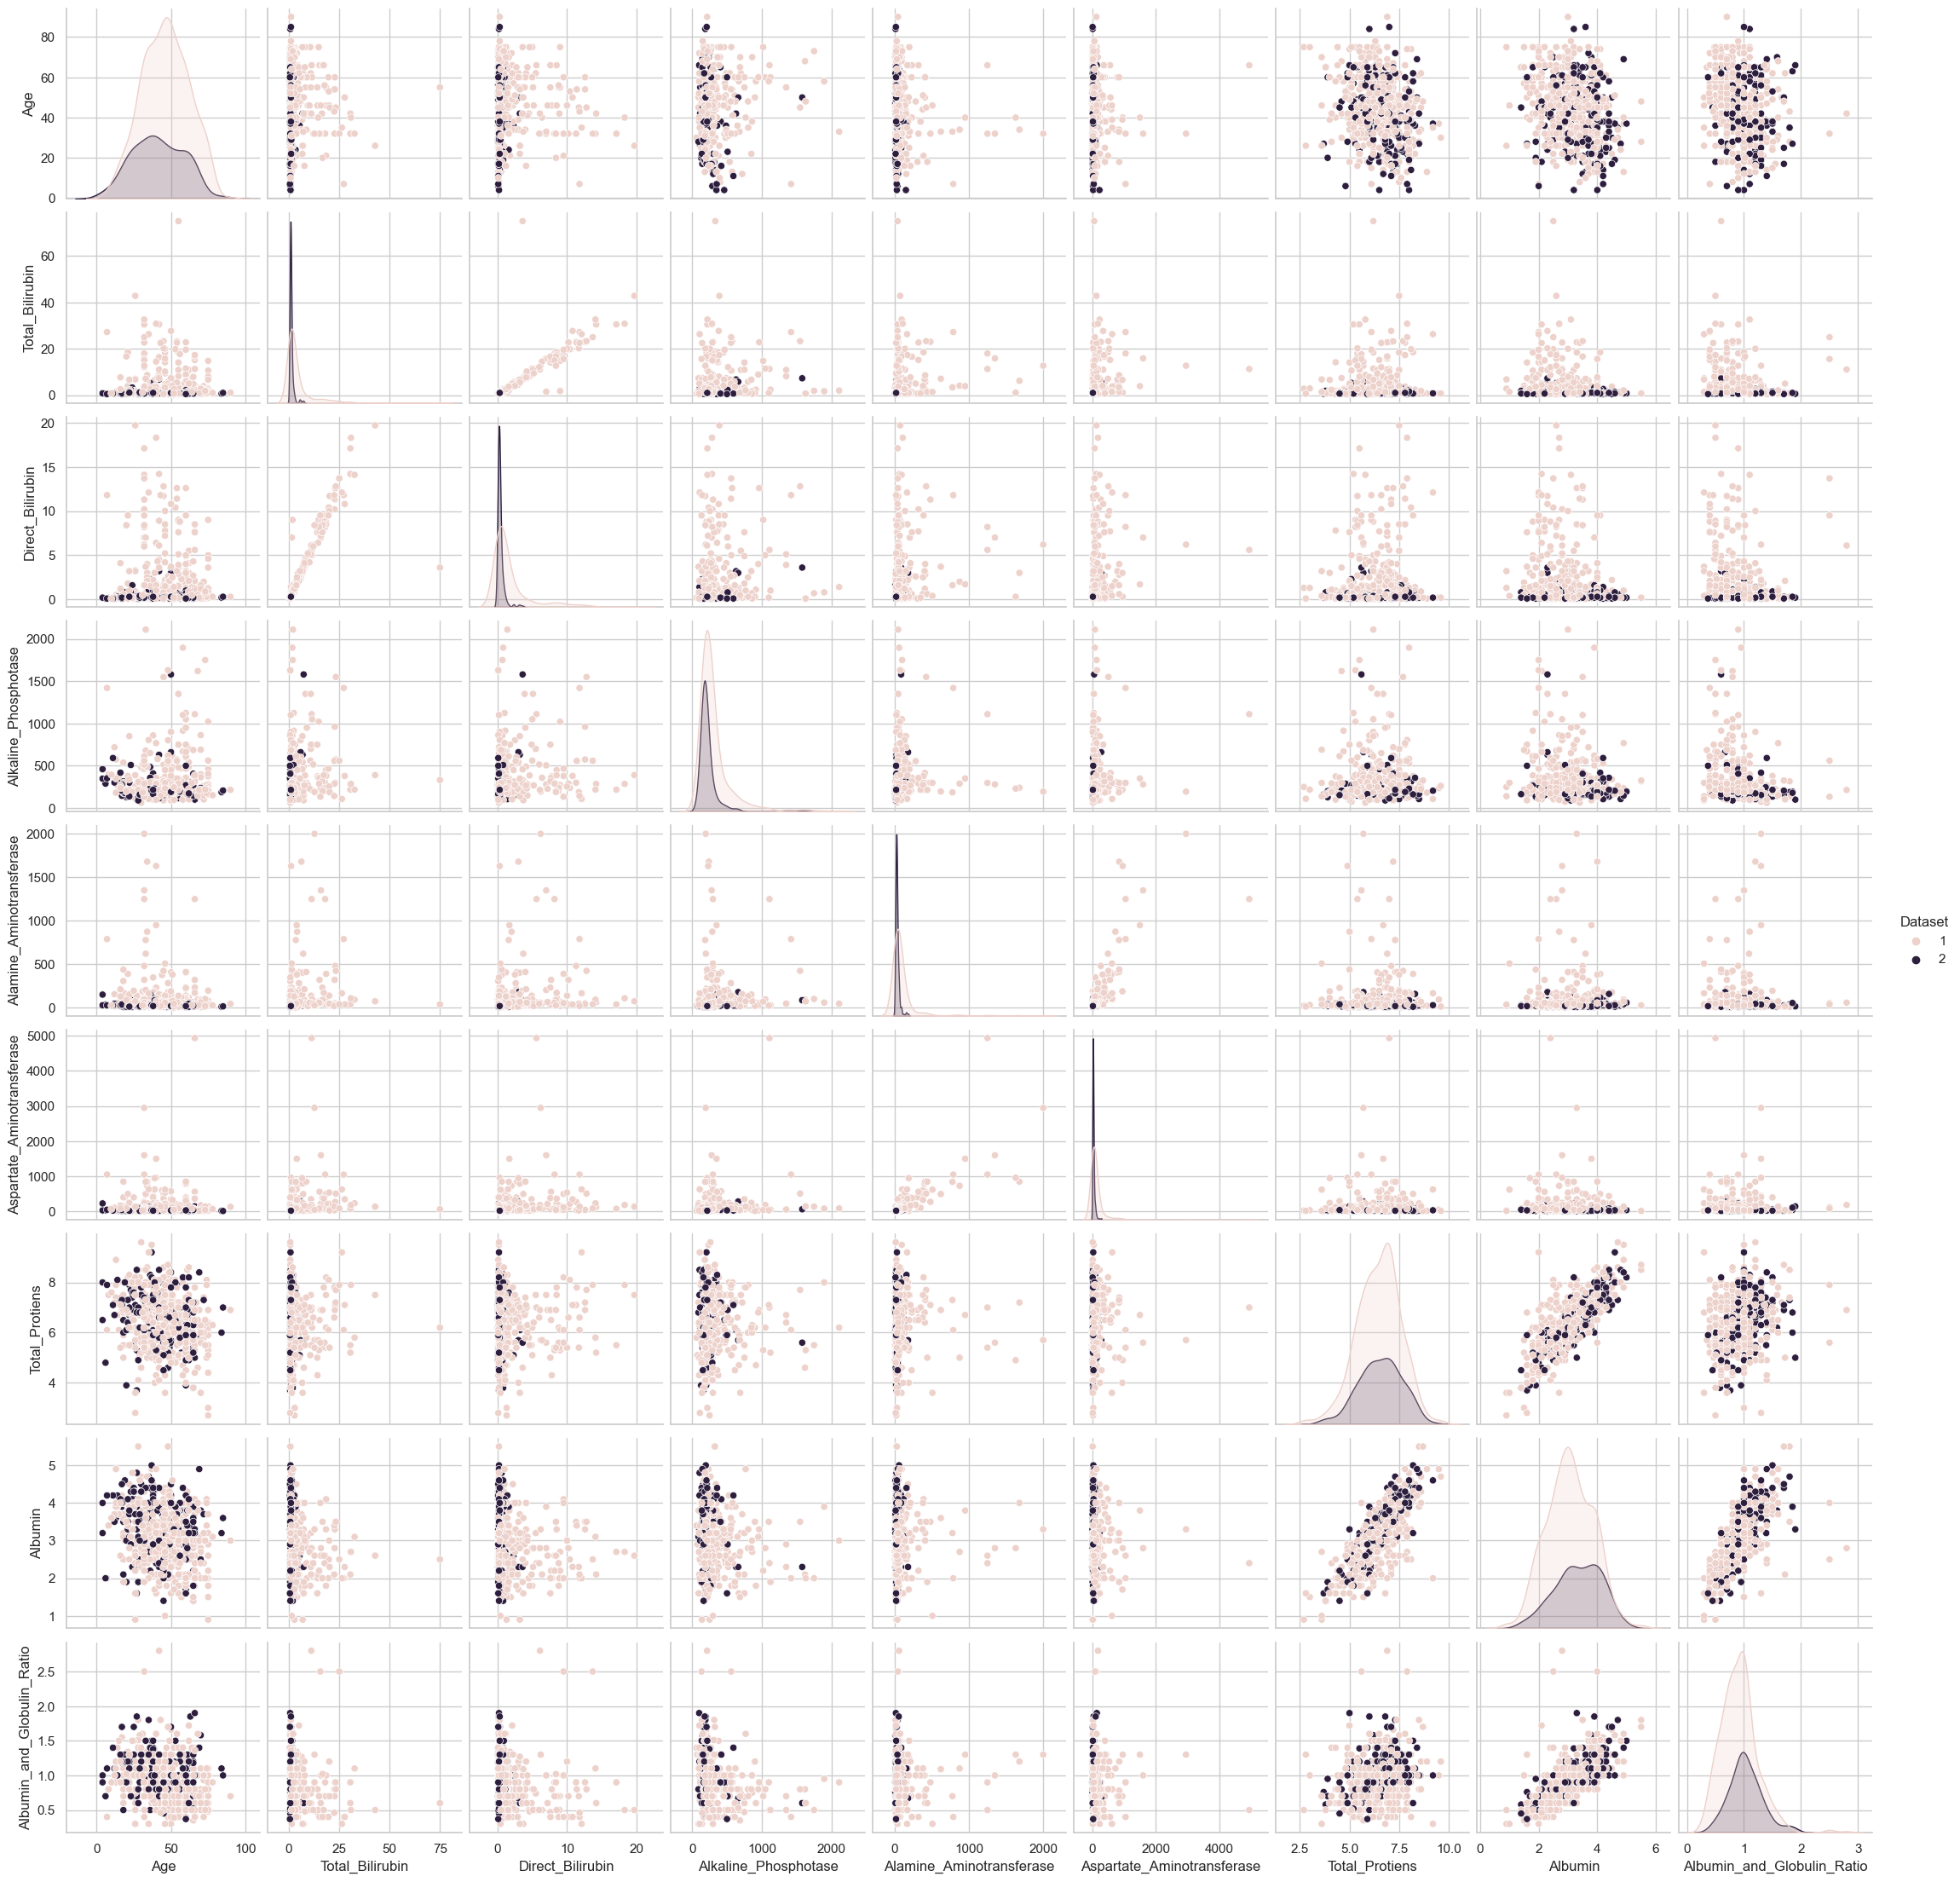

In [25]:
sns.pairplot(df , kind = 'scatter' , diag_kind = 'kde' , hue = 'Dataset')
plt.show()

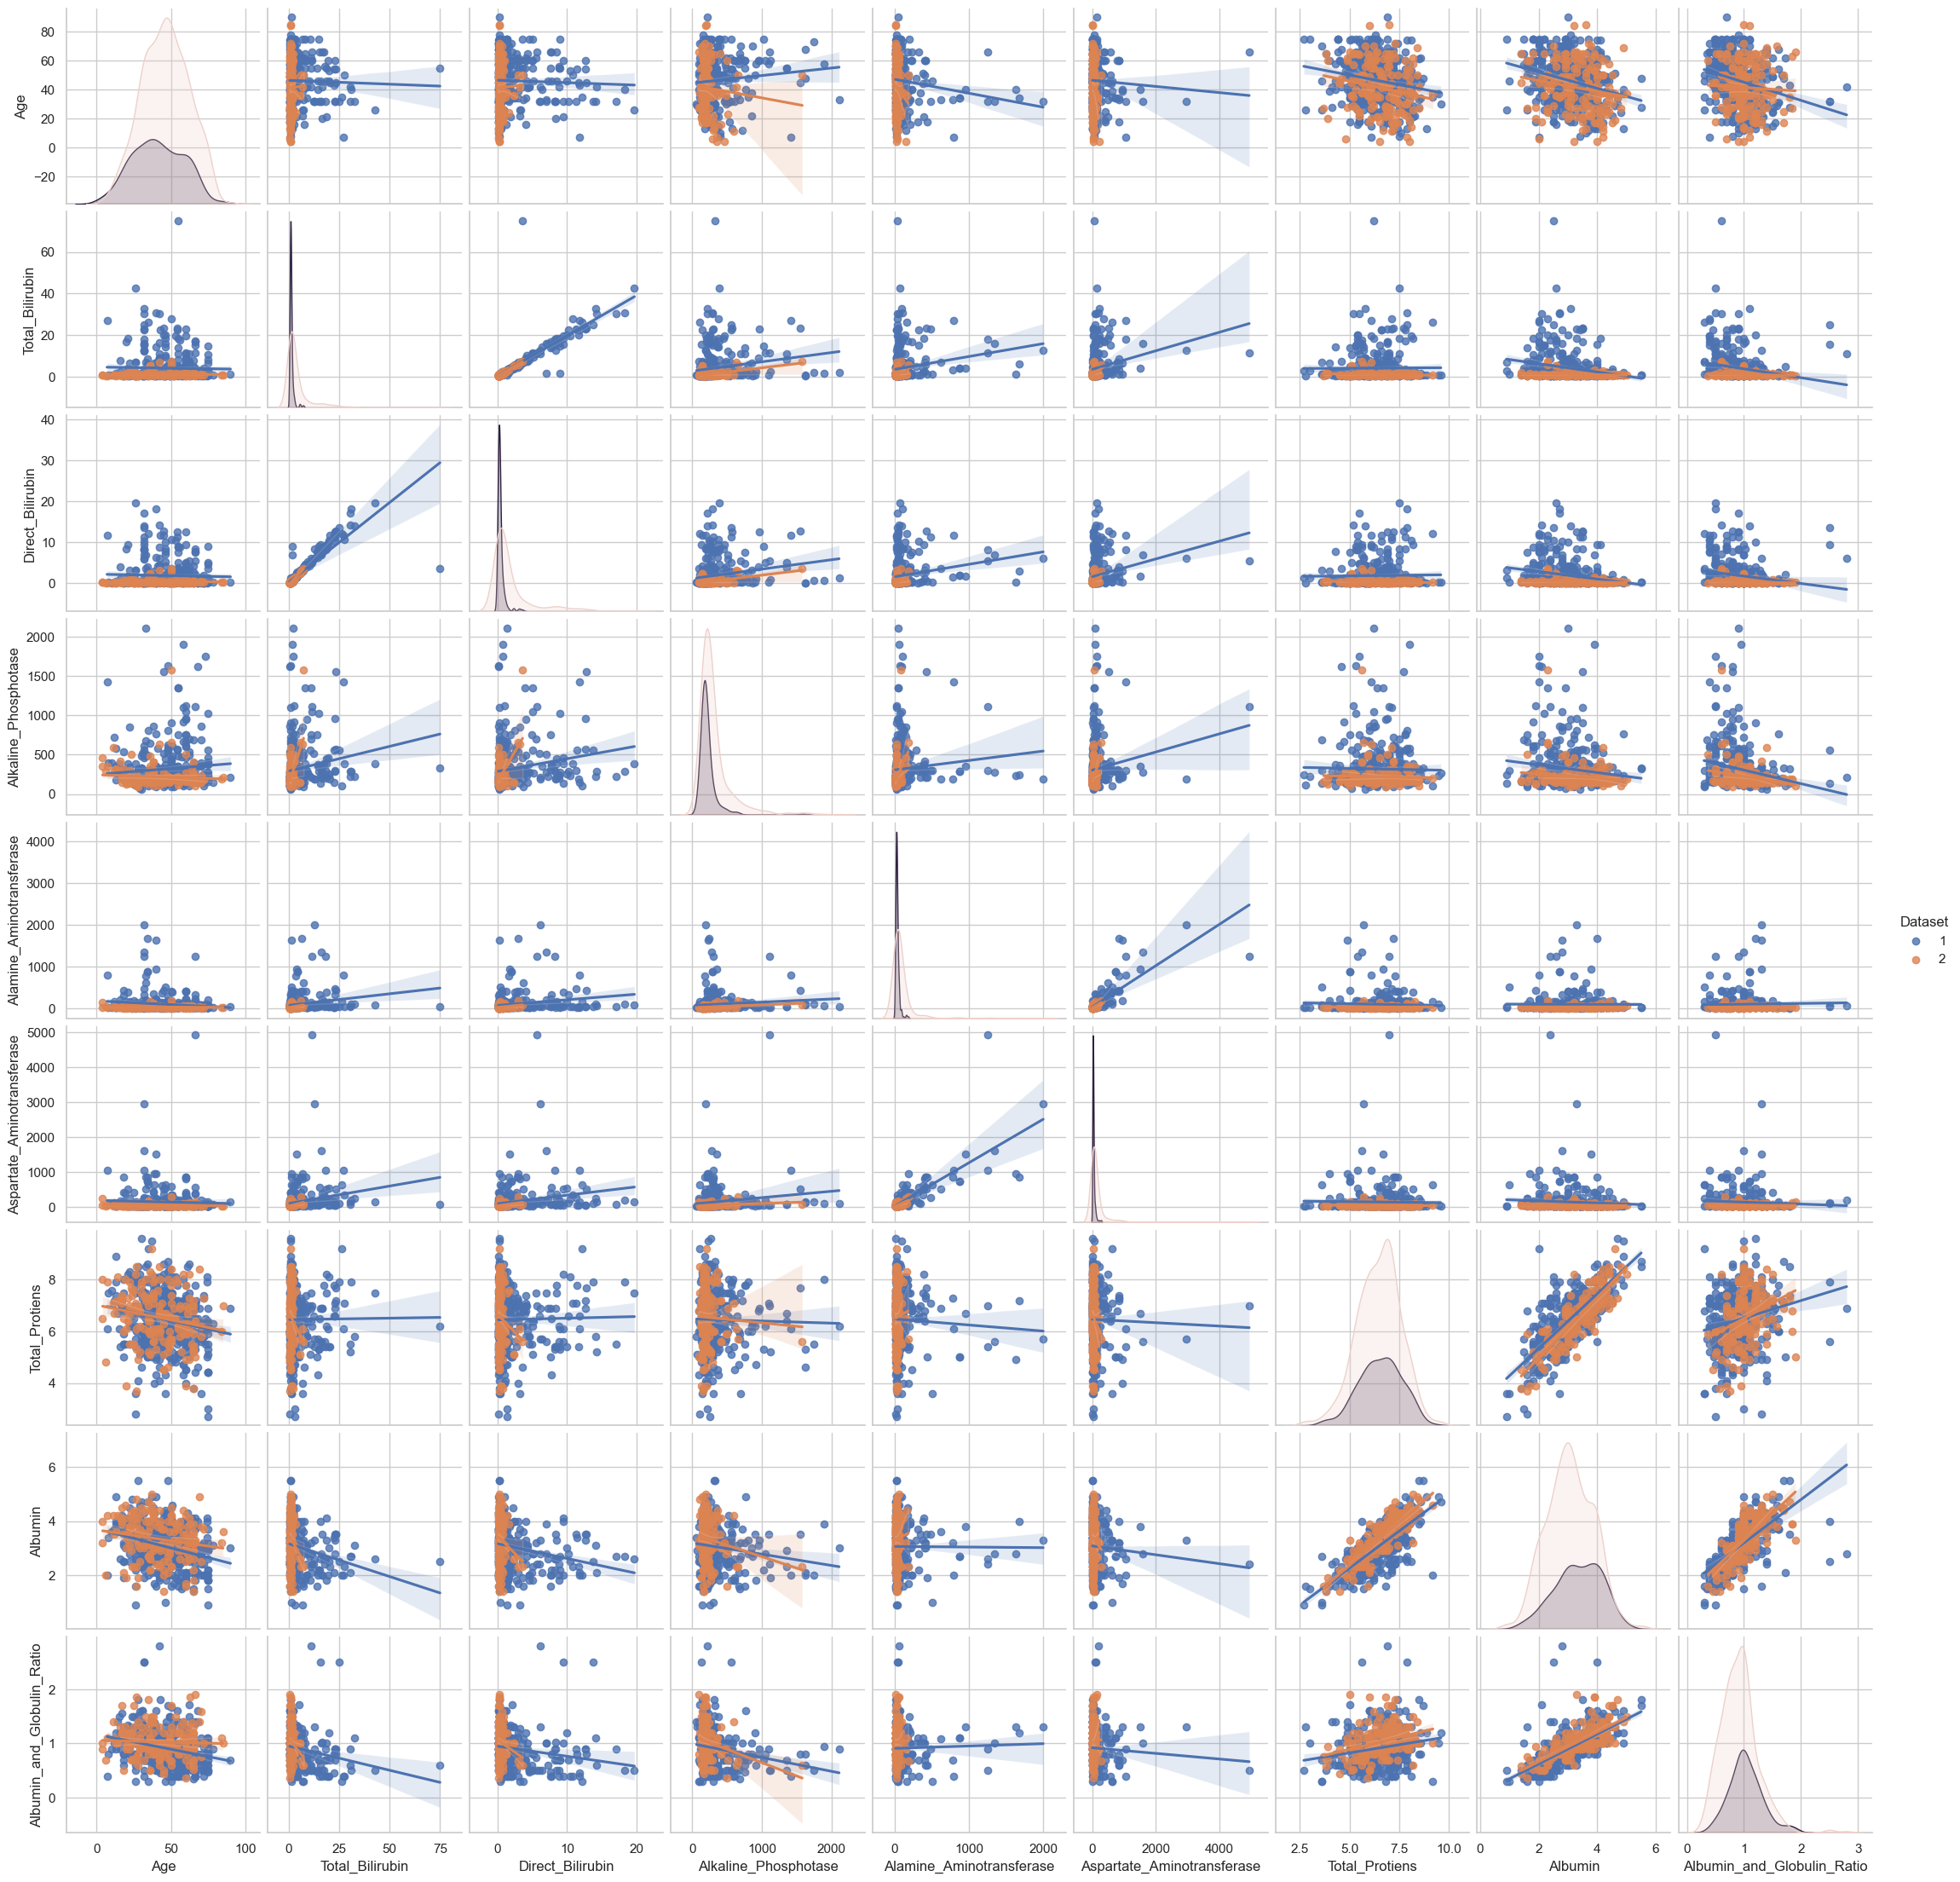

In [26]:
sns.pairplot(df , kind = 'reg' , diag_kind = 'kde' , hue = 'Dataset')
plt.show()

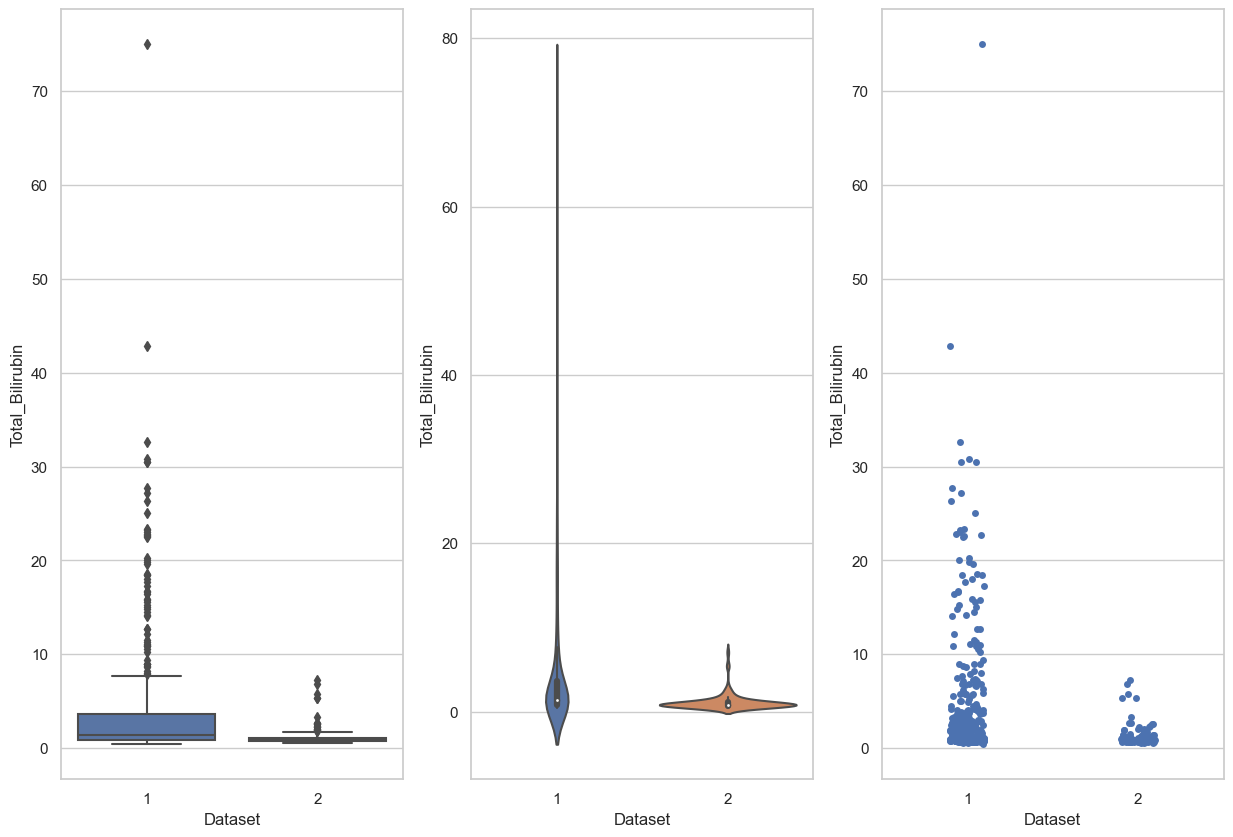

In [27]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Total_Bilirubin' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Total_Bilirubin' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Total_Bilirubin' , data = df , order = order)
plt.show()

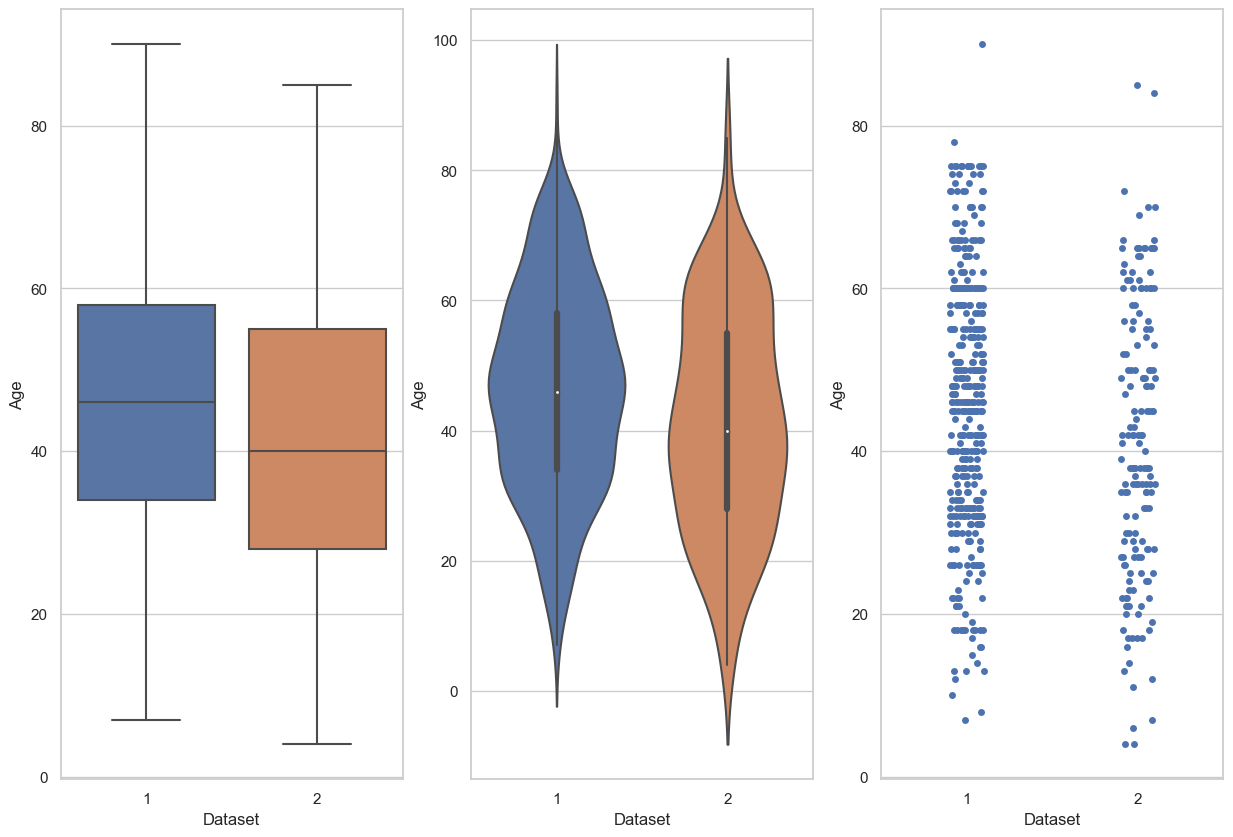

In [28]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Age' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Age' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Age' , data = df , order = order)
plt.show()

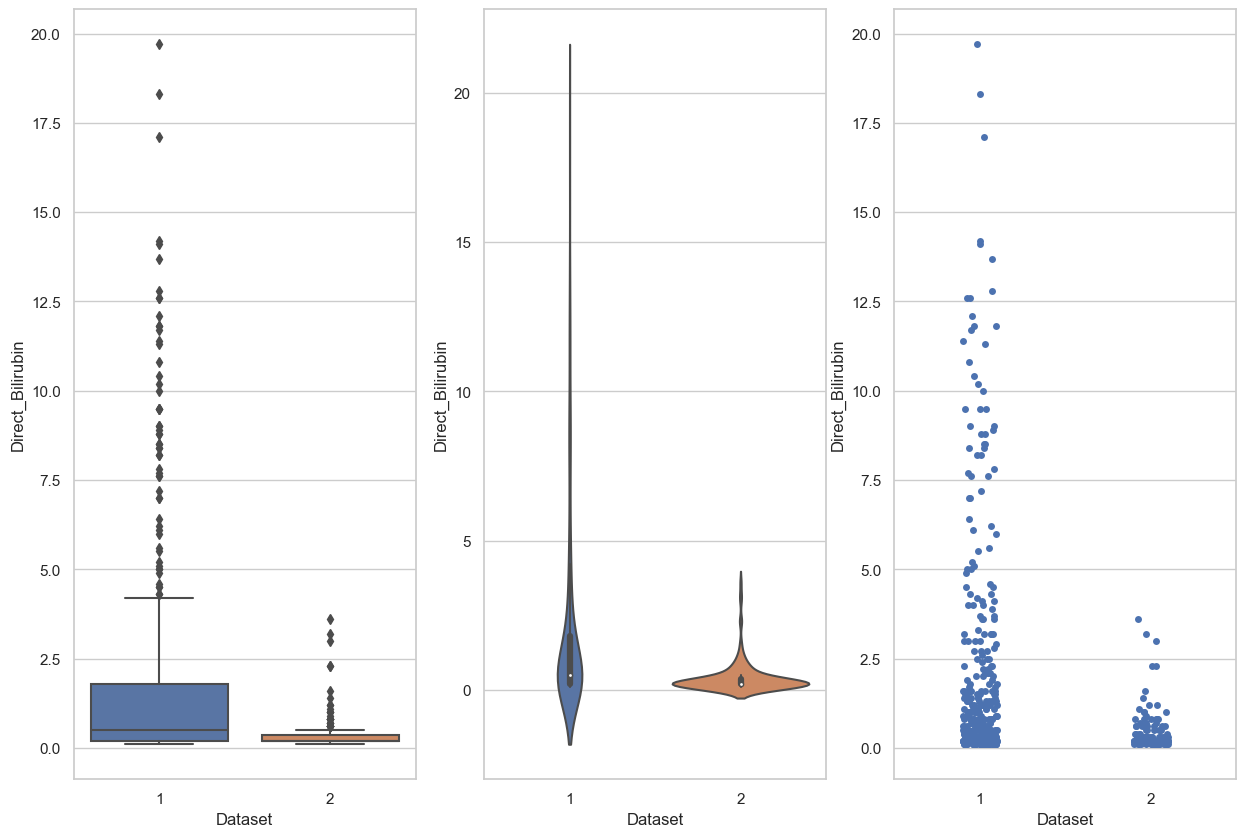

In [29]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Direct_Bilirubin' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Direct_Bilirubin' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Direct_Bilirubin' , data = df , order = order)
plt.show()

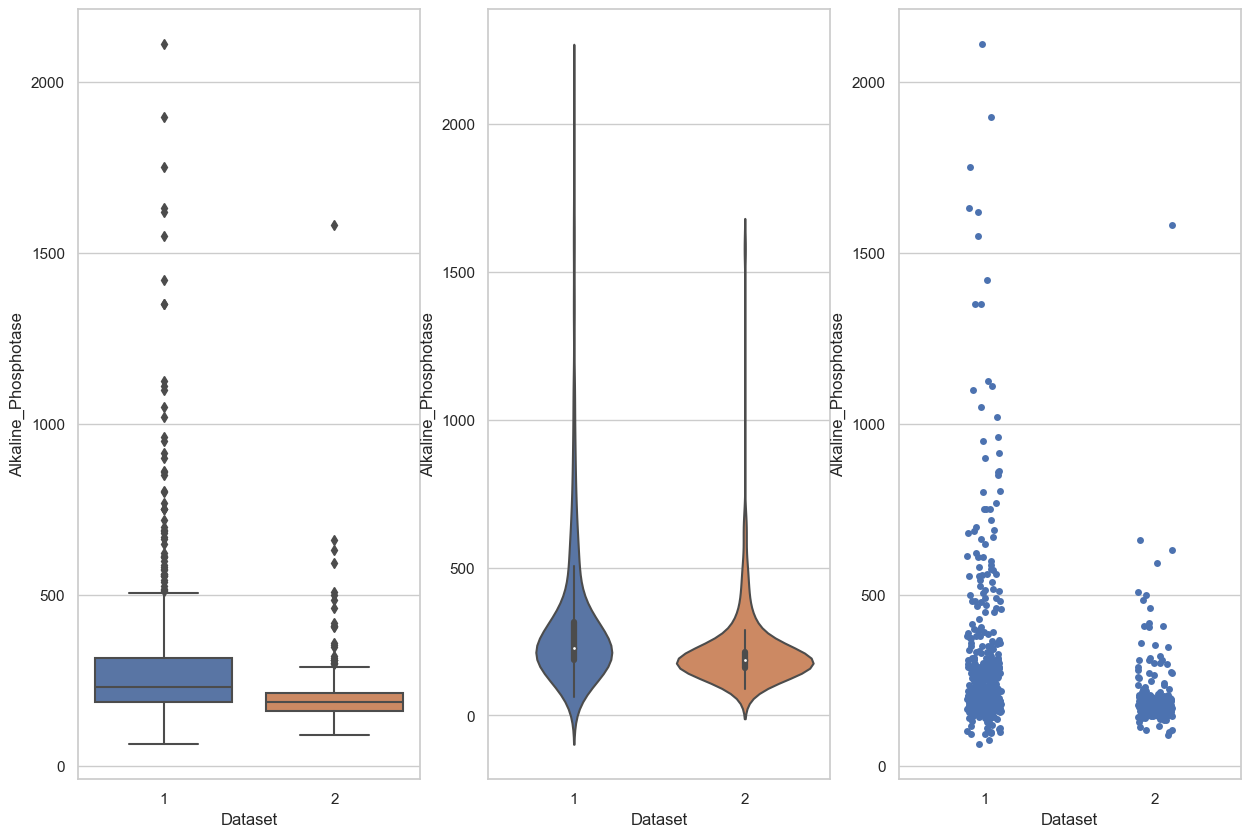

In [30]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Alkaline_Phosphotase' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Alkaline_Phosphotase' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Alkaline_Phosphotase' , data = df , order = order)
plt.show()

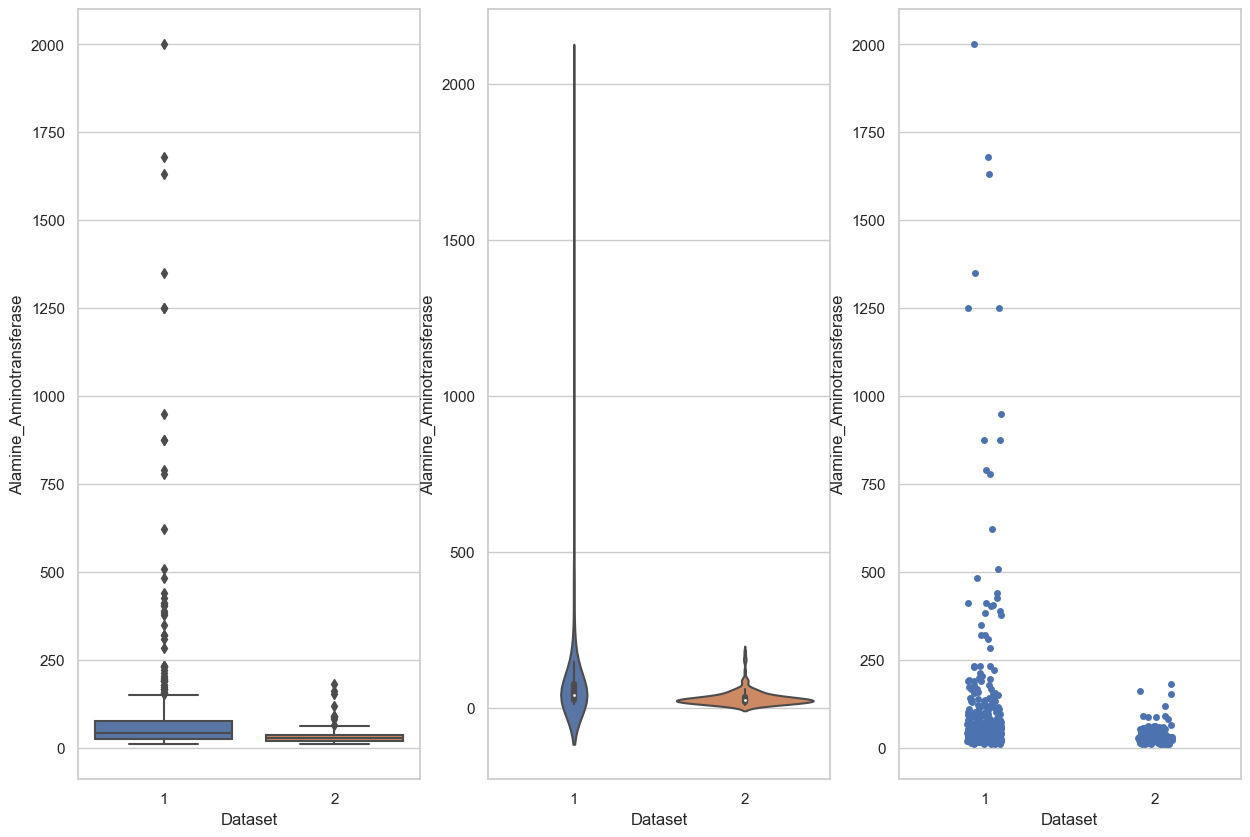

In [31]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Alamine_Aminotransferase' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Alamine_Aminotransferase' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Alamine_Aminotransferase' , data = df , order = order)
plt.show()

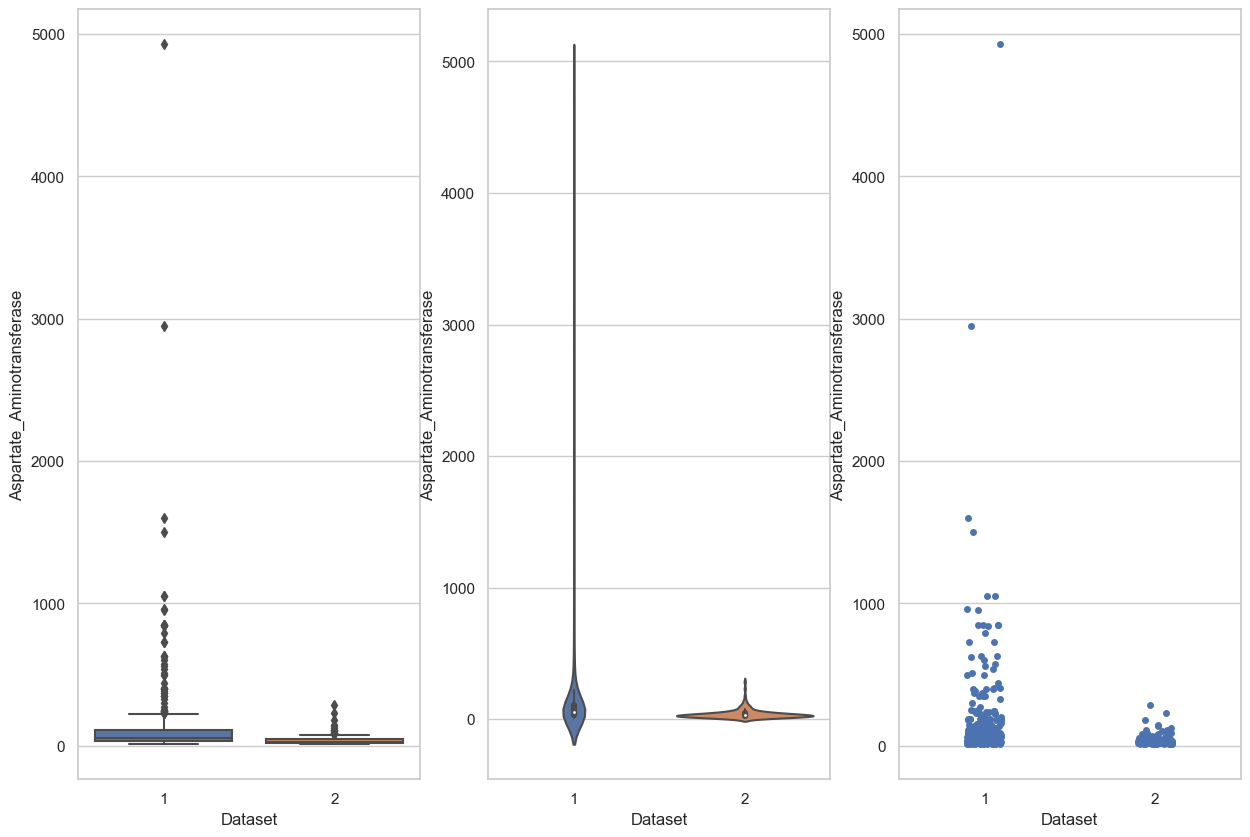

In [32]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Aspartate_Aminotransferase' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Aspartate_Aminotransferase' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Aspartate_Aminotransferase' , data = df , order = order)
plt.show()

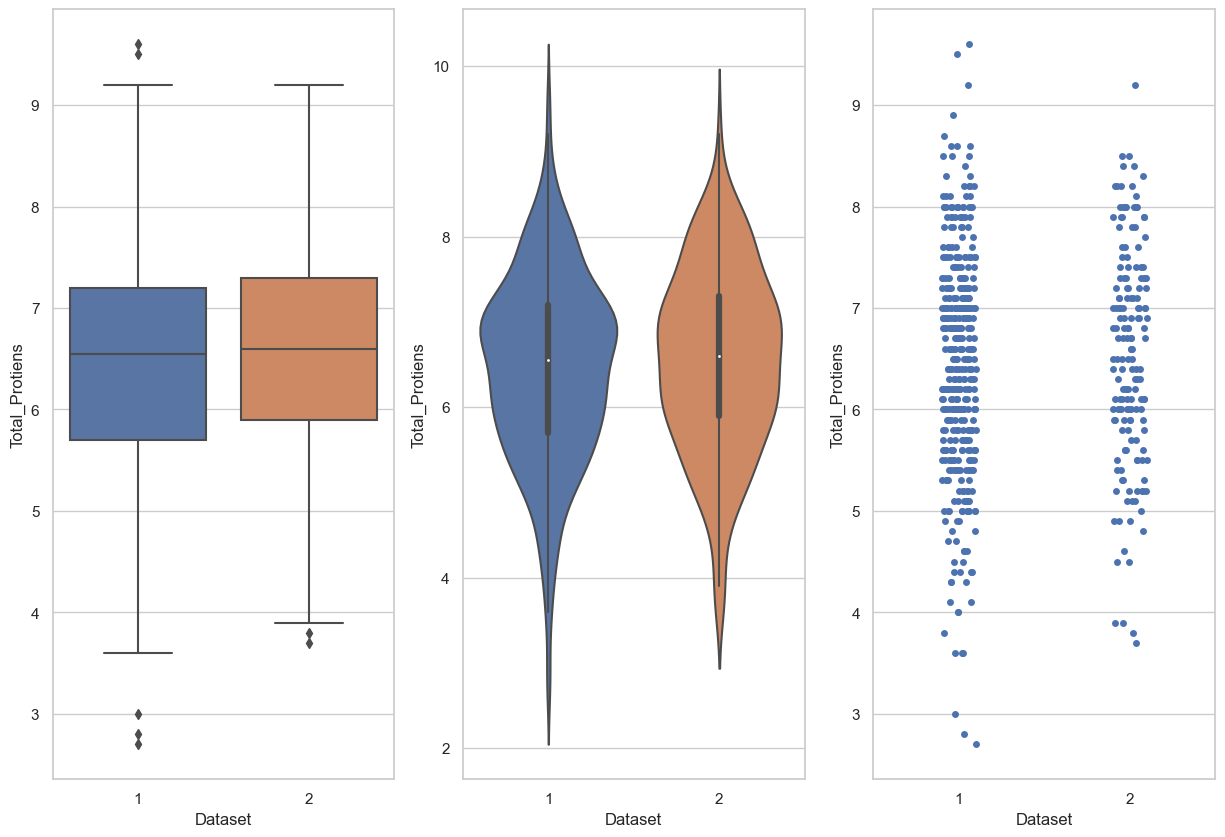

In [33]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Total_Protiens' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Total_Protiens' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Total_Protiens' , data = df , order = order)
plt.show()

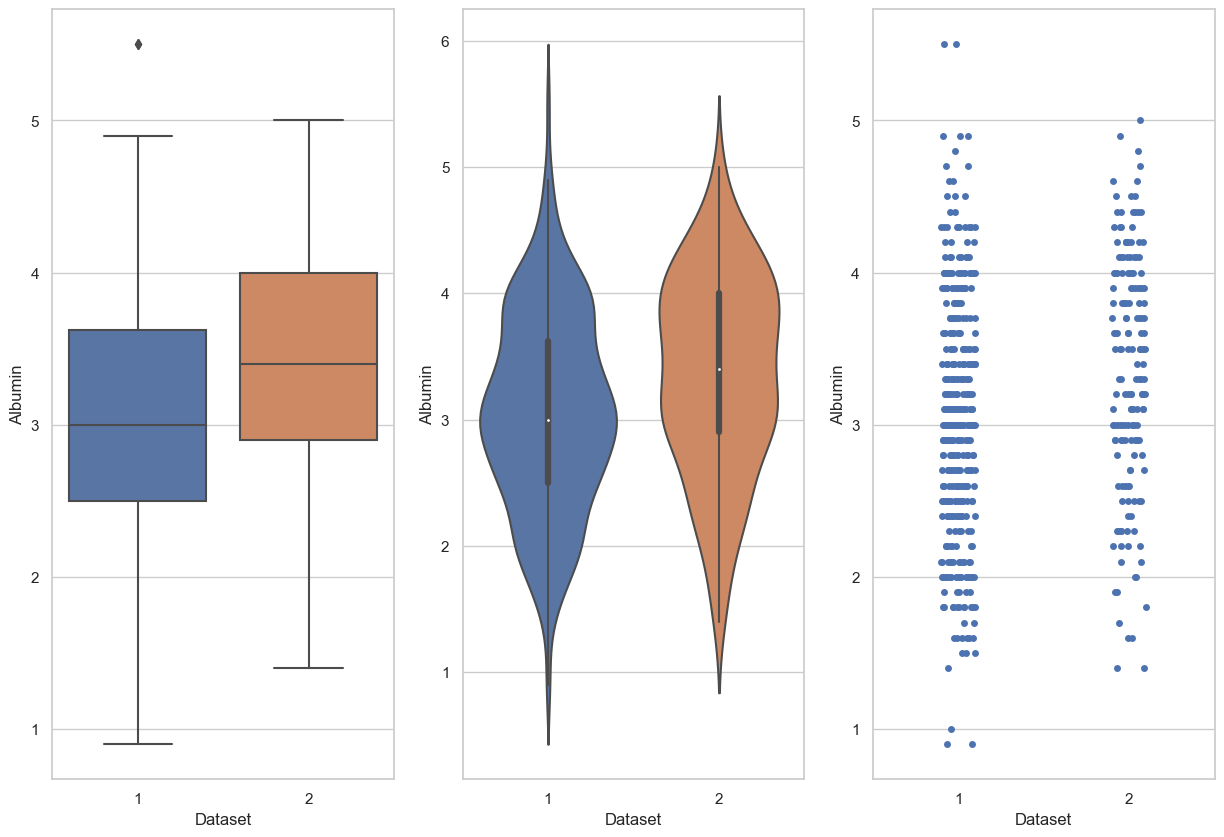

In [34]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Albumin' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Albumin' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Albumin' , data = df , order = order)
plt.show()

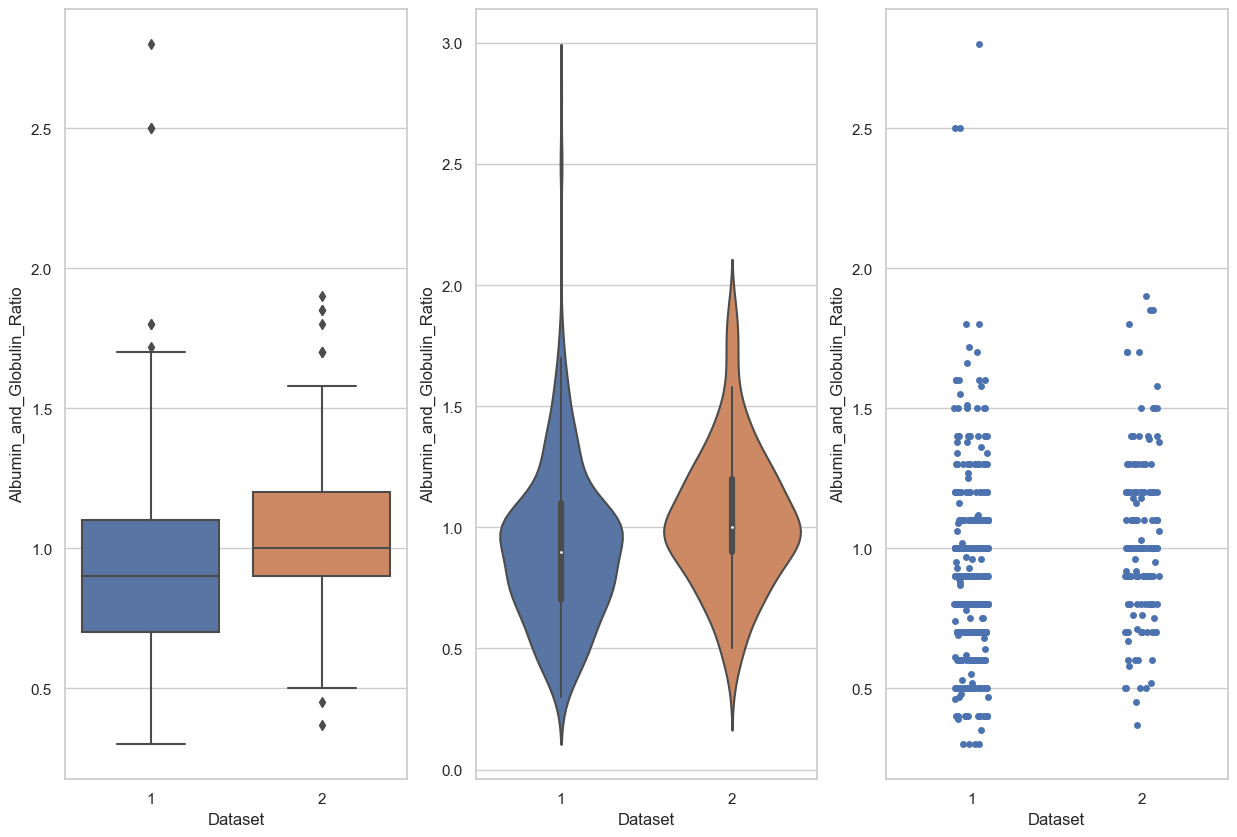

In [35]:
plt.figure(figsize = (15 , 10))
order = df['Dataset'].value_counts().index
plt.subplot(1,3,1)
sns.boxplot(x = 'Dataset' , y = 'Albumin_and_Globulin_Ratio' , data = df , order = order)

plt.subplot(1,3,2)
sns.violinplot(x = 'Dataset' , y = 'Albumin_and_Globulin_Ratio' , data = df , order = order)

plt.subplot(1,3,3)
sns.stripplot(x = 'Dataset' , y = 'Albumin_and_Globulin_Ratio' , data = df , order = order)
plt.show()

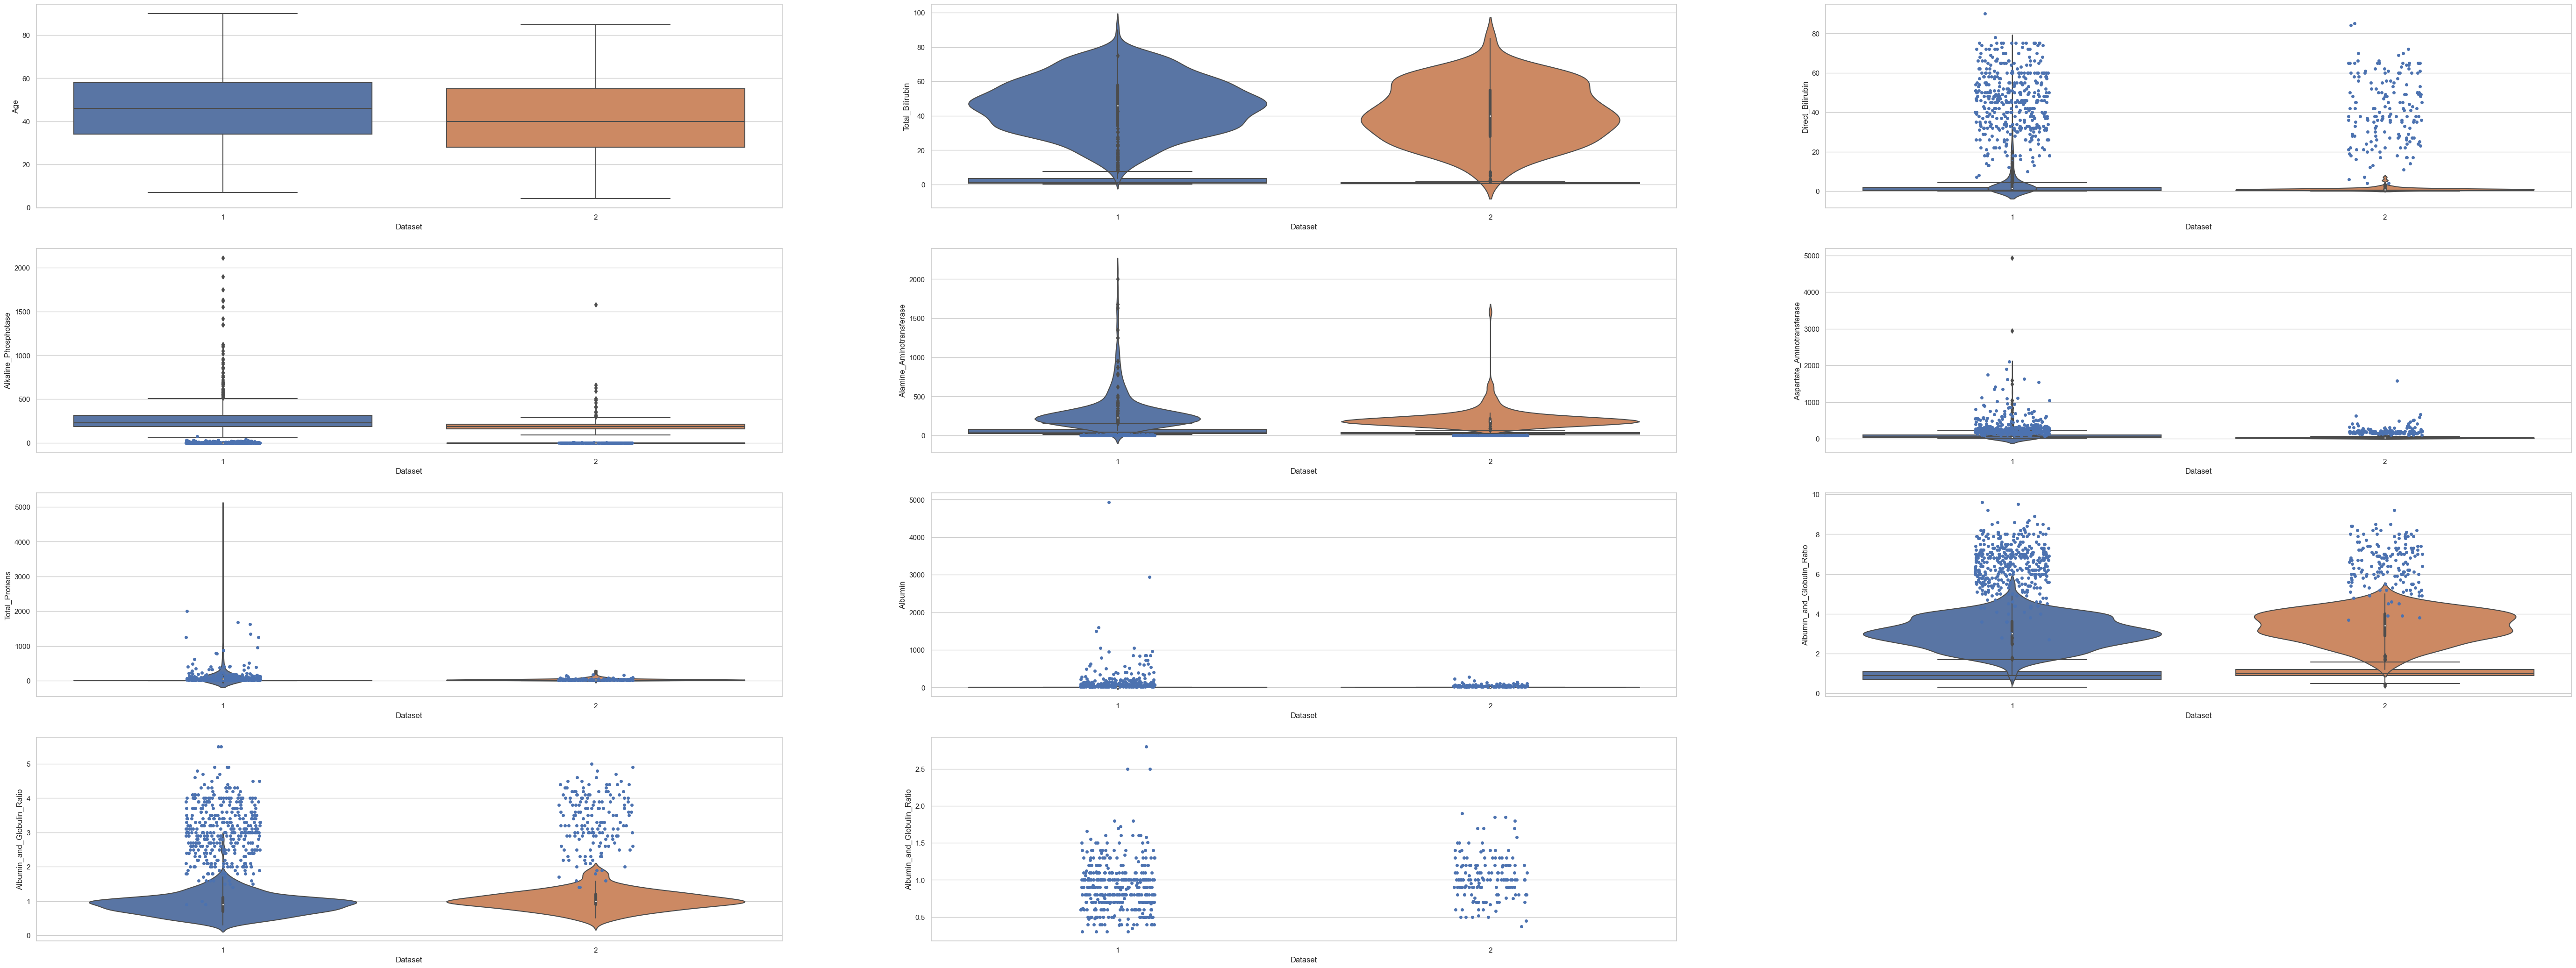

In [36]:
plt.figure(figsize = (70 , 60))
i = 1
for col in df[numeric_features].columns[:-1]:
    
    #print(col)
    order = df['Dataset'].value_counts().index
    
    #print(i)
    
    plt.subplot(9 , 3 , i)
    sns.boxplot(x = df['Dataset'] , y = col , data = df , order = order )
    
    plt.subplot(9,3,i+1)
    sns.violinplot(x = df['Dataset'] , y = col , data = df , order = order)
    
    plt.subplot(9 ,3 , i+2)
    sns.stripplot(x = df['Dataset'] , y = col , data = df , order = order)
    #plt.show()
    
    i = i + 1

In [37]:
df.head(2)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1

#### Numerical columns

In [38]:
numeric_col = []

for col in df.columns[:-1]:
    
    
    if df[col].dtypes != object:
        
        numeric_col.append(col)

In [39]:
print(numeric_col)

['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


#### Character col

In [40]:
character_col = []

for col in df.columns[:-1]:
    
    if df[col].dtypes == 'object':
        
        character_col.append(col)

In [41]:
print(character_col)

['Gender']


## Data Preprocessing

###### 1. Impute Missing values 

In [42]:
df[numeric_col].skew()

Age                           -0.029385
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.992299
dtype: float64

#### Insights : No any data in normal distribution . Every variable has eighter left skewness or right skewness

#### Here we will use KNNImputer instead of normally mean or median approach

### 2.Encoding

##### Beacuse we want to fill the null values by nearest value so thats why we have all data should be in numeric only

#### Here Gender data is try to encode and it has male and female data means its nominal data . so we can encode it

In [43]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [44]:
df.loc[df['Dataset'] == 1 , 'Gender'].value_counts()

Male      324
Female     92
Name: Gender, dtype: int64

In [45]:
df.loc[df['Dataset'] == 2 , 'Gender'].value_counts()

Male      117
Female     50
Name: Gender, dtype: int64

#### Percenatage of male affected by leaver disease 

In [46]:
(df.loc[df['Dataset'] == 1 , 'Gender'].value_counts()['Male'] / df['Gender'].value_counts()['Male']) * 100

73.46938775510205

##### Percenatage of male not  affected by leaver disease

In [47]:
(df.loc[df['Dataset'] == 2 , 'Gender'].value_counts()['Male'] / df['Gender'].value_counts()['Male']) * 100

26.53061224489796

#### Percentage of female affected by leaver disease

In [48]:
df.loc[df['Dataset'] == 1 , 'Gender'].value_counts()['Female'] / df['Gender'].value_counts()['Female']

0.647887323943662

#### Percentage of female not affected by leaver disease

In [49]:
df.loc[df['Dataset'] == 2 , 'Gender'].value_counts()['Female'] / df['Gender'].value_counts()['Female']

0.352112676056338

#### OneHotEncoder

In [50]:
df = pd.get_dummies(df , columns = ['Gender'] , drop_first = True)

In [51]:
df.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Male  
0      3.3                        0.90        1            0  
1      3.2                        0.74        1            1

In [52]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Male'],
      dtype='object')

#### KNNImputer

In [53]:
from sklearn.impute import KNNImputer

In [54]:
knn = KNNImputer(n_neighbors=5,
    weights='distance')

In [55]:
knn

KNNImputer(weights='distance')

In [56]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
Gender_Male                   0
dtype: int64

In [57]:
data = df.copy()

In [58]:
x = df[['Age' , 'Total_Bilirubin' , 'Direct_Bilirubin', 'Alkaline_Phosphotase',
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
        'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
        'Gender_Male'] ]

In [59]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Male'],
      dtype='object')

In [60]:
x.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Gender_Male  
0      3.3                        0.90            0  
1      3.2                        0.74            1

In [61]:
df = knn.fit_transform(x)

In [62]:
df = pd.DataFrame(df , columns = x.columns)

In [63]:
df = pd.concat([df , data['Dataset']] , axis = 1)

In [64]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Gender_Male                   0
Dataset                       0
dtype: int64

In [65]:
df.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0              0.7               0.1                 187.0   
1  62.0             10.9               5.5                 699.0   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                      16.0                        18.0             6.8   
1                      64.0                       100.0             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Gender_Male  Dataset  
0      3.3                        0.90          0.0        1  
1      3.2                        0.74          1.0        1

#### Insights : We impute null values

### 3. Handling The outliers

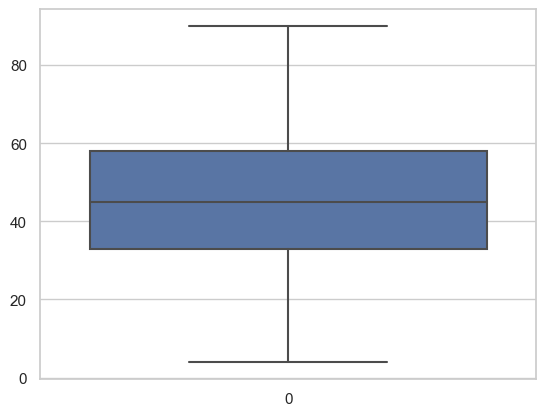

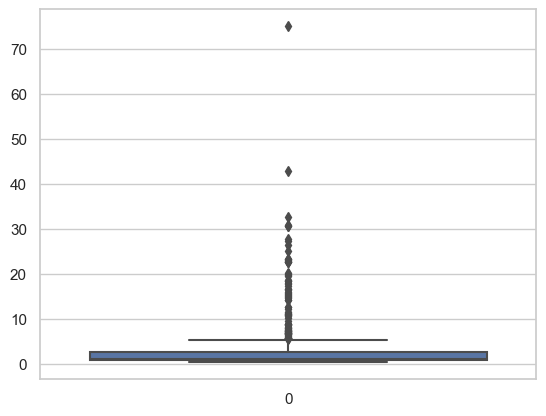

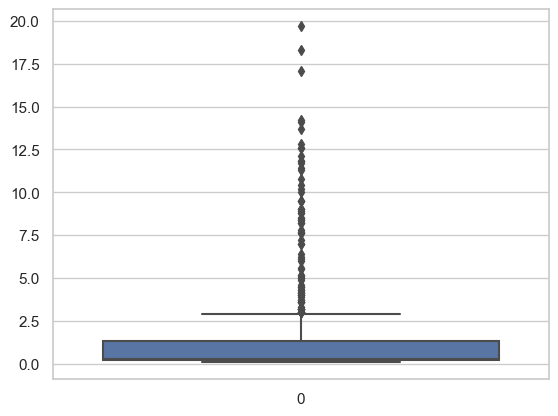

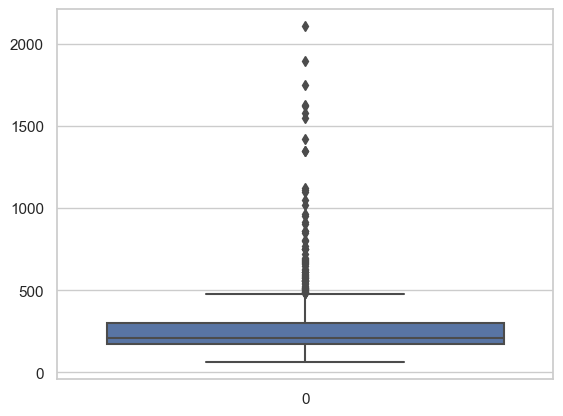

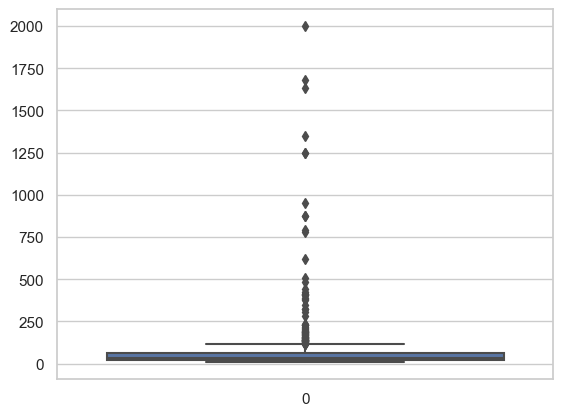

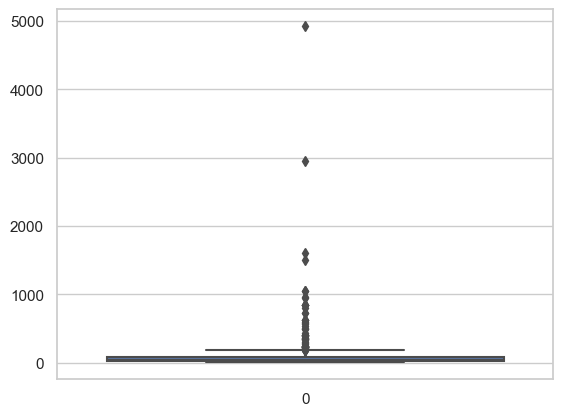

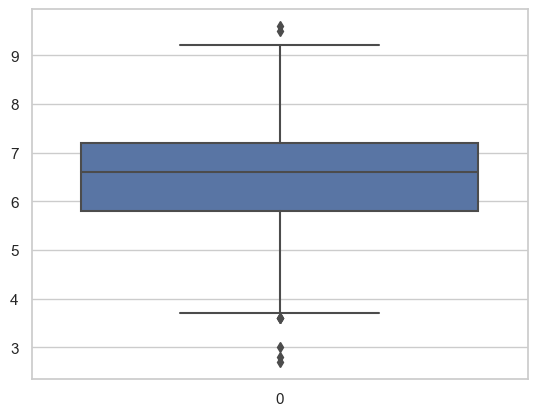

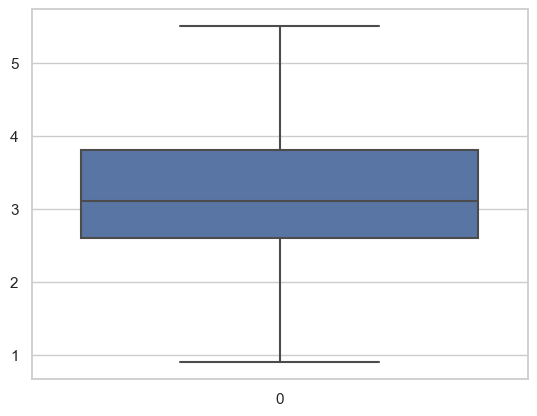

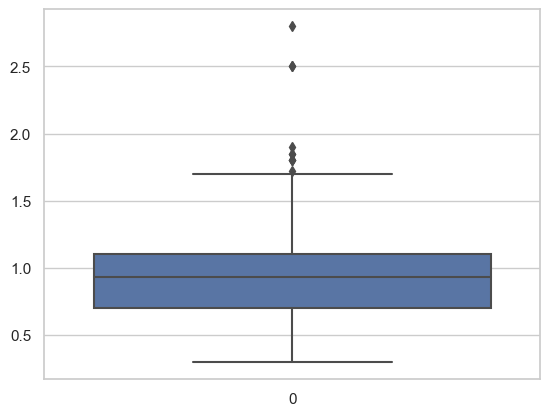

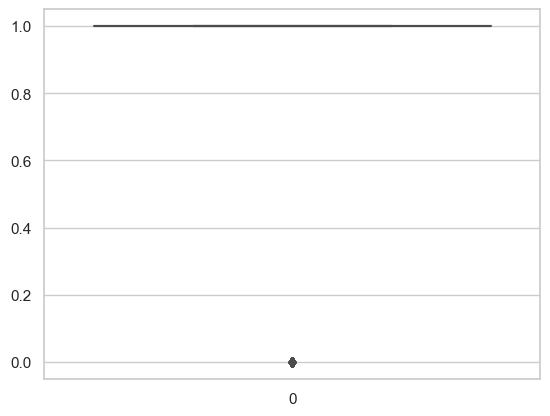

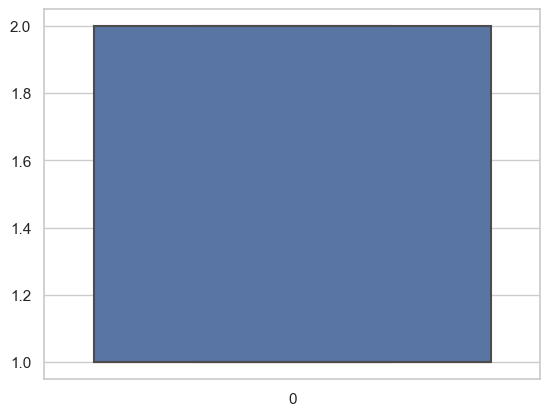

In [66]:
def detect_outliers(col):
    
    sns.boxplot(df[col])
    plt.show()
    
    
for i in list(df.select_dtypes(exclude = ['object']).columns):
              
              detect_outliers(i)

#### Capping Outliers

In [67]:
def cap_outliers(col):
    
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper = Q1 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    
    df[col].clip(lower , upper , inplace = True)

In [68]:
for i in df[numeric_col]:
    
    cap_outliers(i)

##### After treating outliers

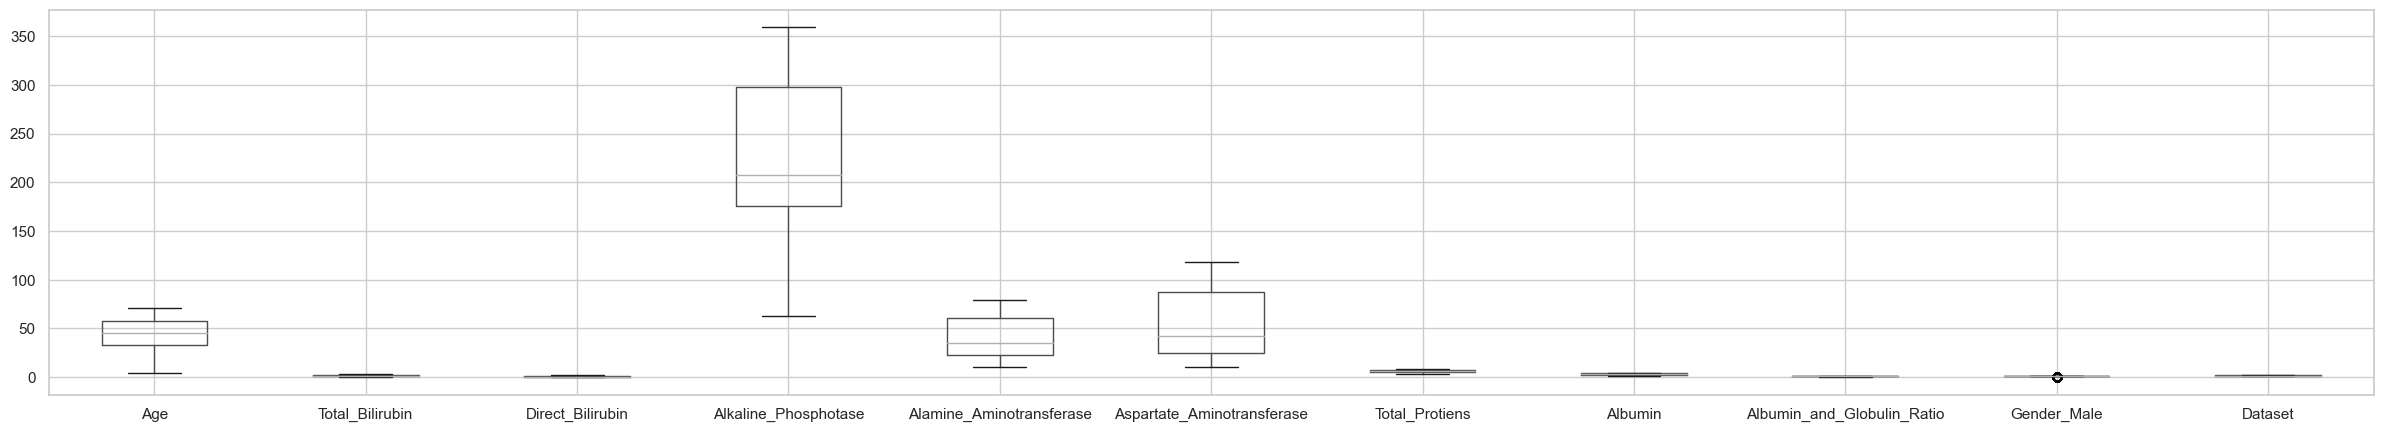

In [69]:
plt.figure(figsize = (30 , 5))
df.boxplot()
plt.show()

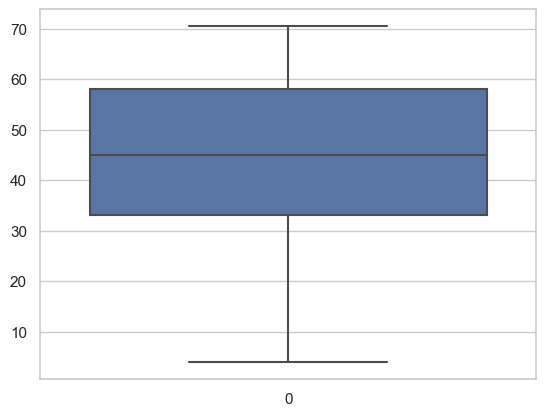

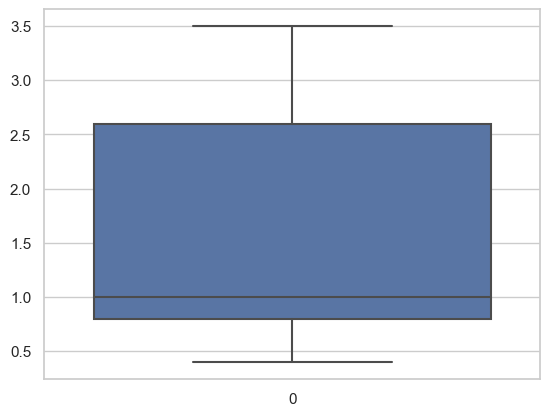

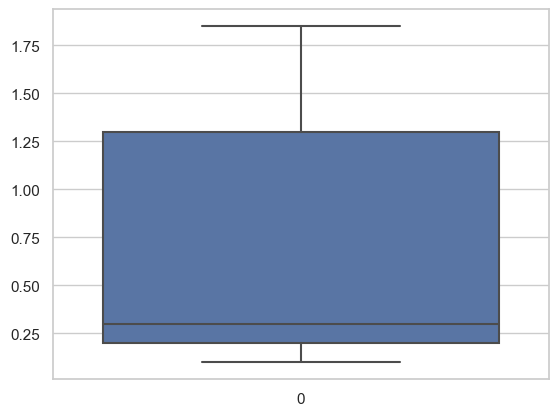

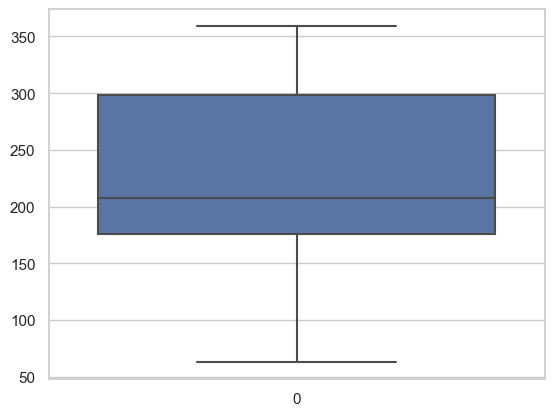

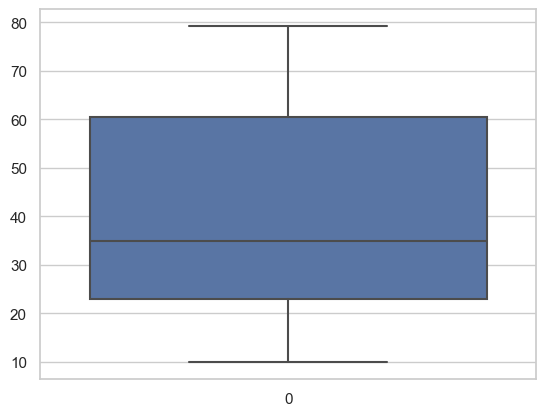

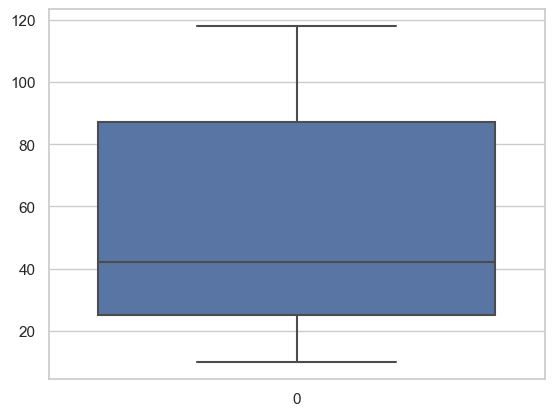

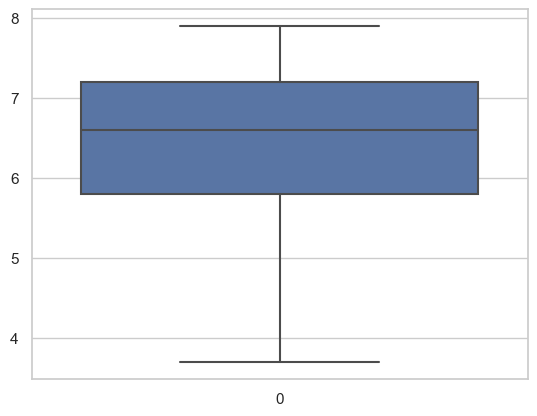

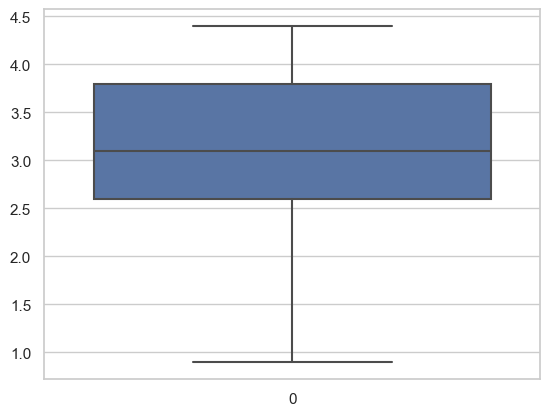

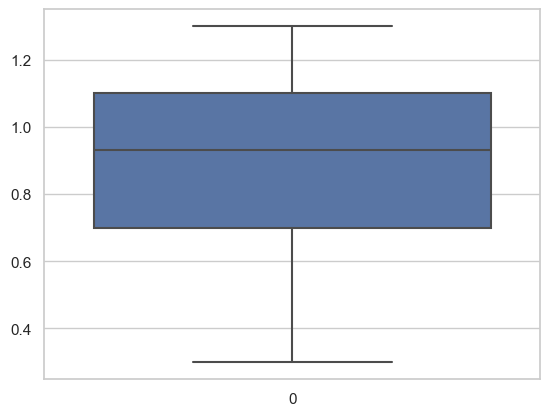

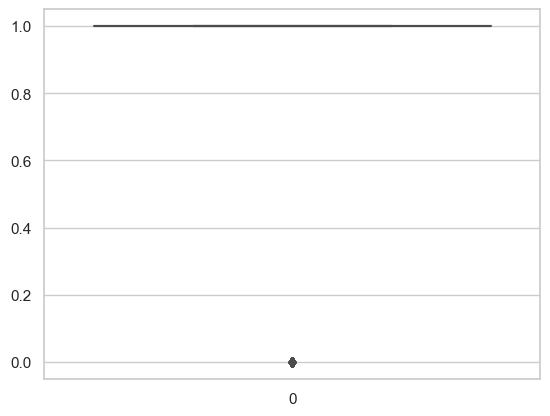

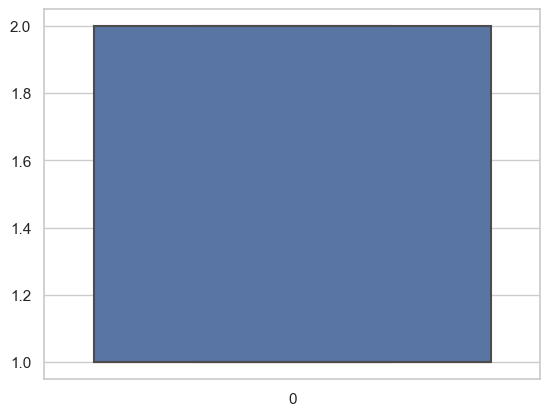

In [70]:
def outliers(col):
    
    sns.boxplot(df[col])
    plt.show()
    
    
for i in list(df.select_dtypes(exclude = ['object']).columns):
    
    outliers(i)

In [71]:
df.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0              0.7              0.10                187.00   
1  62.0              3.5              1.85                359.25   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                      16.0                        18.0             6.8   
1                      64.0                       100.0             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Gender_Male  Dataset  
0      3.3                        0.90          0.0        1  
1      3.2                        0.74          1.0        1

### ANNOVA Test for to check significant variable

In [72]:
numeric_col

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

In [73]:
significant_col = []

for col in numeric_col:
    
    IV = col  # Replace with your IV name
    
    DV = "Dataset"   # Replace with your DV name
    
    
    formula = f"{DV} ~ {IV}"
    
    model = ols(formula, data=df).fit()
    
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA table
    
    #print(anova_table)
    
    p_value = anova_table["PR(>F)"][0]
    
    significance_level = 0.05  # Common significance level
    
    if p_value < significance_level:
        
        print(col , "The variable is significant.")
        significant_col.append(col)
        print()
        print('**'*20)
        
    else:
        print(col , "The variable is not significant.")

Age The variable is significant.

****************************************
Total_Bilirubin The variable is significant.

****************************************
Direct_Bilirubin The variable is significant.

****************************************
Alkaline_Phosphotase The variable is significant.

****************************************
Alamine_Aminotransferase The variable is significant.

****************************************
Aspartate_Aminotransferase The variable is significant.

****************************************
Total_Protiens The variable is not significant.
Albumin The variable is significant.

****************************************
Albumin_and_Globulin_Ratio The variable is significant.

****************************************


In [74]:
significant_col

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

### Chi Suare Test for to check signficant variable for categorical data

In [75]:
contingency_table = pd.crosstab(df['Gender_Male'], df["Dataset"])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print('p value :' , p)


if p < 0.05:
        
        print('This is significant variable because its p value less than 0.05 :' , col)
        
        print(f"Chi-square test for {col} : p-value =", p)
        
        print()
        
        print('***'*20)
        
        print()
        
        
if p > 0.05:
    
        print('This is not significant variable because its p value greater than 0.05 :' , col)
        
        print(f"Chi-square test for {col} : p-value =", p)
        
        print()
        
        print('***'*20)
        
        print()
        
        

p value : 0.059665846857774464
This is not significant variable because its p value greater than 0.05 : Albumin_and_Globulin_Ratio
Chi-square test for Albumin_and_Globulin_Ratio : p-value = 0.059665846857774464

************************************************************



In [76]:
df.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0              0.7              0.10                187.00   
1  62.0              3.5              1.85                359.25   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                      16.0                        18.0             6.8   
1                      64.0                       100.0             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Gender_Male  Dataset  
0      3.3                        0.90          0.0        1  
1      3.2                        0.74          1.0        1

In [77]:
significant_data = df[significant_col]

In [78]:
df = pd.concat([significant_data , df['Dataset']] , axis = 1)

In [79]:
df.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0              0.7              0.10                187.00   
1  62.0              3.5              1.85                359.25   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Albumin  \
0                      16.0                        18.0      3.3   
1                      64.0                       100.0      3.2   

   Albumin_and_Globulin_Ratio  Dataset  
0                        0.90        1  
1                        0.74        1

#### Data split into dependent and independent variable

In [80]:
df.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0              0.7              0.10                187.00   
1  62.0              3.5              1.85                359.25   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Albumin  \
0                      16.0                        18.0      3.3   
1                      64.0                       100.0      3.2   

   Albumin_and_Globulin_Ratio  Dataset  
0                        0.90        1  
1                        0.74        1

In [81]:
x = df.drop(columns = ['Dataset'] , axis = 1)
y = df['Dataset']

In [82]:
x.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0              0.7              0.10                187.00   
1  62.0              3.5              1.85                359.25   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Albumin  \
0                      16.0                        18.0      3.3   
1                      64.0                       100.0      3.2   

   Albumin_and_Globulin_Ratio  
0                        0.90  
1                        0.74

In [83]:
y.head(2)

0    1
1    1
Name: Dataset, dtype: int64

### 4.Feature Scaling

In [84]:
scaler = StandardScaler()

In [85]:
scaled_x = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)

In [86]:
scaled_x.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  1.306606        -0.843337         -0.915738             -0.608660   
1  1.115483         1.704624          1.729828              1.616836   

   Alamine_Aminotransferase  Aspartate_Aminotransferase   Albumin  \
0                 -1.149901                   -1.033687  0.223606   
1                  0.954219                    1.199118  0.093374   

   Albumin_and_Globulin_Ratio  
0                   -0.074605  
1                   -0.700431

### 5.Data Balancing

In [87]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [88]:
majority_class = df['Dataset'].value_counts()[1.0]
minority_class = df['Dataset'].value_counts()[2.0]

In [89]:
print(majority_class)

416


In [90]:
print(minority_class)

167


In [91]:
if minority_class * 2 <= majority_class:
    
    print('Data is Imbalance')
    
else:
    
    print('Data is Balance')

Data is Imbalance


##### Insights : Data is imbalance here but we are not make data balance . we just make startified data means it split the all categories in train and test 

In [92]:
df.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0              0.7              0.10                187.00   
1  62.0              3.5              1.85                359.25   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Albumin  \
0                      16.0                        18.0      3.3   
1                      64.0                       100.0      3.2   

   Albumin_and_Globulin_Ratio  Dataset  
0                        0.90        1  
1                        0.74        1

### Train Test Split

In [93]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 14 , stratify = y)

In [94]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(466, 8) (117, 8) (466,) (117,)


### train test split scaled data

In [95]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [96]:
print(x_train_scaled.shape , x_test_scaled.shape)

(466, 8) (117, 8)


### Now our data is ready for model building

In [97]:
estimator = [('logistic_Regression' , LogisticRegression()) , ('RandomForest' , RandomForestClassifier()) , ('Bagging' , BaggingClassifier()) ,   ('AdaBoost' , AdaBoostClassifier()) , ('Gradient' , GradientBoostingClassifier()) ,('decisionTree' , DecisionTreeClassifier())]

In [98]:
estimator

[('logistic_Regression', LogisticRegression()),
 ('RandomForest', RandomForestClassifier()),
 ('Bagging', BaggingClassifier()),
 ('AdaBoost', AdaBoostClassifier()),
 ('Gradient', GradientBoostingClassifier()),
 ('decisionTree', DecisionTreeClassifier())]

#### Checking Average accuries of models

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
for i in estimator:
    
    accuracy = cross_val_score(i[1] , x_train , y_train , cv = 10 , scoring='accuracy')
    
    print(i[0] , ':' , np.mean(accuracy))
    


logistic_Regression : 0.7275208140610545
RandomForest : 0.6651711378353377
Bagging : 0.6888991674375579
AdaBoost : 0.6889916743755782
Gradient : 0.6628584643848288
decisionTree : 0.6520814061054578


In [101]:
estimator1 = [('Niave Bayes' , GaussianNB()) , ('KNN' , KNeighborsClassifier()) , ('SVM'  , svm.SVC())]

In [102]:
estimator1

[('Niave Bayes', GaussianNB()),
 ('KNN', KNeighborsClassifier()),
 ('SVM', SVC())]

In [103]:
for i in estimator1:
    
    accuracy = cross_val_score(i[1] , x_train_scaled , y_train , cv = 10 , scoring = 'accuracy')
    
    print(f'{i}  : {np.mean(accuracy)}')

('Niave Bayes', GaussianNB())  : 0.6287696577243294
('KNN', KNeighborsClassifier())  : 0.6629509713228492
('SVM', SVC())  : 0.7188714153561517


## Stacking

In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
final_estimator = LogisticRegression()

In [106]:
stack = StackingClassifier(estimators = estimator,
    final_estimator= final_estimator,
    cv=10)  

In [107]:
stack

StackingClassifier(cv=10,
                   estimators=[('logistic_Regression', LogisticRegression()),
                               ('RandomForest', RandomForestClassifier()),
                               ('Bagging', BaggingClassifier()),
                               ('AdaBoost', AdaBoostClassifier()),
                               ('Gradient', GradientBoostingClassifier()),
                               ('decisionTree', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

##### Fit training Model

In [108]:
stack.fit(x_train , y_train)

StackingClassifier(cv=10,
                   estimators=[('logistic_Regression', LogisticRegression()),
                               ('RandomForest', RandomForestClassifier()),
                               ('Bagging', BaggingClassifier()),
                               ('AdaBoost', AdaBoostClassifier()),
                               ('Gradient', GradientBoostingClassifier()),
                               ('decisionTree', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

##### Prediction of training

In [109]:
y_train_pred = stack.predict(x_train)

In [110]:
print(y_train_pred)

[1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]


#### Training Accuracy

In [111]:
training_accuracy_stack = accuracy_score(y_train , y_train_pred)

In [112]:
training_accuracy_stack

0.8068669527896996

#### confusion_matrix of training 

In [113]:
confusion_matrix(y_train , y_train_pred)

array([[329,   4],
       [ 86,  47]], dtype=int64)

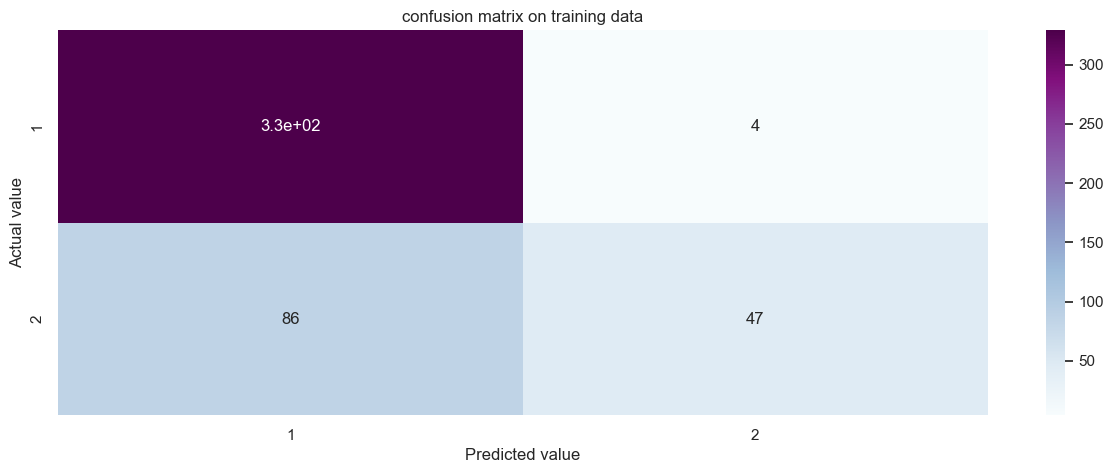

In [114]:
plt.figure(figsize = (15 , 5))
sns.heatmap(confusion_matrix(y_train , y_train_pred) , 
            annot = True , cbar = True  ,cmap = 'BuPu' ,
            xticklabels = y.value_counts().index ,
            yticklabels = y.value_counts().index)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('confusion matrix on training data')
plt.show()

### 1 means patient has liver dieasease
### 2 means  patient has don't have liver diseasease

#### Insights : 


#### True Negative : 332    ( they have disese correctly predicted TN)
#### False Postive : 1         (actually they have but prediction says they don't have means FP) 
#### False Negative : 77     ( actually they don't have but prediction says have means FN)
#### True Positive : 56        ( they don't have correctly ppredicted TP)

#### Classification Report on training data

In [115]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           1       0.79      0.99      0.88       333
           2       0.92      0.35      0.51       133

    accuracy                           0.81       466
   macro avg       0.86      0.67      0.70       466
weighted avg       0.83      0.81      0.77       466



##### Insights : we get micro accuracy 0.74 %

##### AUC ROC Curve

In [116]:
roc_auc_score_train = roc_auc_score(y_train , y_train_pred)

In [117]:
roc_auc_score_train

0.6706857233173023

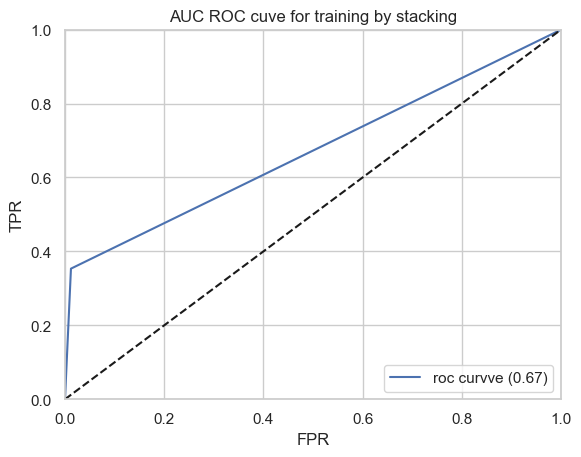

In [118]:
fpr , tpr , threshold = roc_curve(y_train , y_train_pred , pos_label = 2)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_train)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve for training by stacking')
plt.legend(loc = 'lower right')
plt.show()

### Prediction on testing data

In [119]:
y_test_pred = stack.predict(x_test)

In [120]:
y_test_pred

array([2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Accuracy on testing data

In [121]:
testing_accuracy = accuracy_score(y_test , y_test_pred)

In [122]:
testing_accuracy

0.717948717948718

### AUC ROC Curve on tesring data

In [123]:
roc_auc_score_test = roc_auc_score(y_test , y_test_pred)

In [124]:
roc_auc_score_test

0.5407512402551382

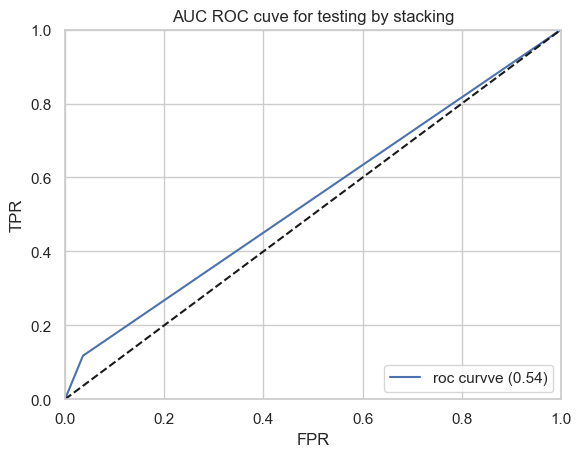

In [125]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred , pos_label = 2)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_test)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve for testing by stacking')
plt.legend(loc = 'lower right')
plt.show()

### Accuracy Score of Stacking Model

In [126]:
print('Training Accuracy :' , training_accuracy_stack)
print('Testing_Accuracy:', testing_accuracy)

Training Accuracy : 0.8068669527896996
Testing_Accuracy: 0.717948717948718


## BaggingClassifier

In [135]:
Bagging = BaggingClassifier(estimator=None,
    n_estimators=10)

#### fit Model of bagging

In [136]:
Bagging.fit(x_train , y_train)

BaggingClassifier()

#### Training Prediction

In [137]:
y_train_pred_bg = Bagging.predict(x_train)

##### Training Accuracy of BaggingClassifier

In [138]:
training_accuracy_bg = accuracy_score(y_train , y_train_pred_bg)

In [139]:
training_accuracy_bg

0.9957081545064378

#### Confusion Matrix of training

In [140]:
cm_train = confusion_matrix(y_train , y_train_pred_bg)

In [141]:
cm_train

array([[332,   1],
       [  1, 132]], dtype=int64)

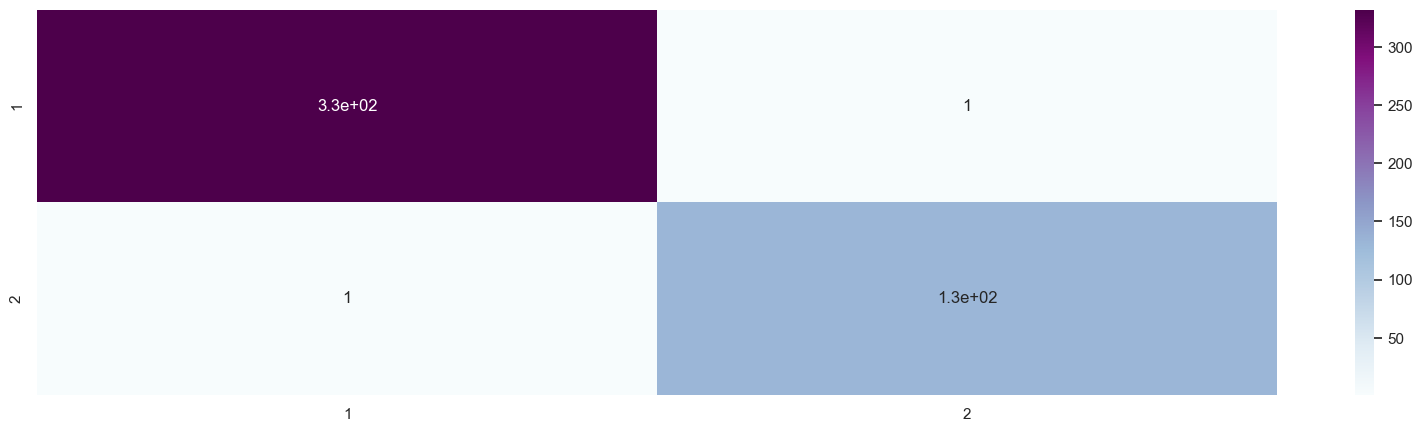

In [142]:
plt.figure(figsize = (20 , 5))
sns.heatmap(cm_train , annot = True , cmap = 'BuPu' , cbar = True ,  
            xticklabels = y.value_counts().index ,
           yticklabels = y.value_counts().index)
plt.show()

#### Classification Report

In [143]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           1       0.79      0.99      0.88       333
           2       0.92      0.35      0.51       133

    accuracy                           0.81       466
   macro avg       0.86      0.67      0.70       466
weighted avg       0.83      0.81      0.77       466



##### Insights : We get Avg accuracy 80 %

### Roc_Auc Curve

In [144]:
roc_auc_score_bg = roc_auc_score(y_train , y_train_pred_bg)

In [145]:
roc_auc_score_bg

0.9947391000022577

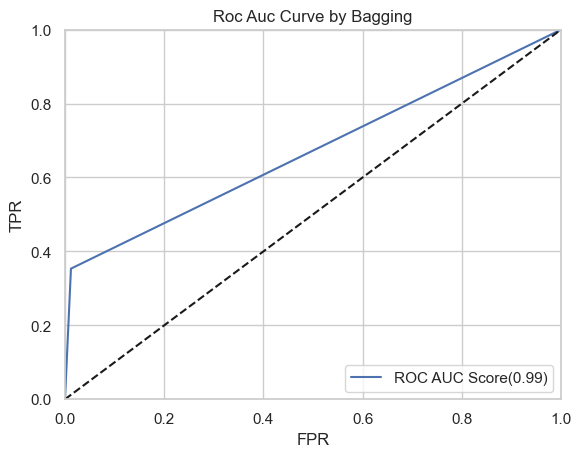

In [146]:
fpr , tpr , threshold = roc_curve(y_train , y_train_pred , pos_label = 2)
plt.plot(fpr , tpr , label = 'ROC AUC Score(%1.2f)'%roc_auc_score_bg)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc Auc Curve by Bagging')
plt.legend(loc = 'lower right')
plt.show()

##### Testing Prediction

In [147]:
y_test_pred_bg = Bagging.predict(x_test)

#### Testing Accuracy

In [148]:
accuracy_score(y_test , y_test_pred_bg)

0.7350427350427351

### BaggingClassifier get overfitted 